In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_4872\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The  Dataset



## [Source]()

# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "COVID-CT-MD"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT

## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

patient_id source     class country  sex   age partition slice_selection  \
0     NCP_96   CNCB  COVID-19   China    M  74.0     train          Expert   
1    NCP_270   CNCB  COVID-19   China  N/A   N/A     train          Expert   
2    NCP_322   CNCB  COVID-19   China  N/A   N/A     train          Expert   
3   NCP_1276   CNCB  COVID-19   China  N/A   N/A     train          Expert   
4   NCP_2683   CNCB  COVID-19   China  N/A   N/A     train          Expert   

  verified_finding   view modality  sample_count  
0              Yes  Axial       CT           121  
1              Yes  Axial       CT           124  
2              Yes  Axial       CT            40  
3              Yes  Axial       CT            32  
4              Yes  Axial       CT             9

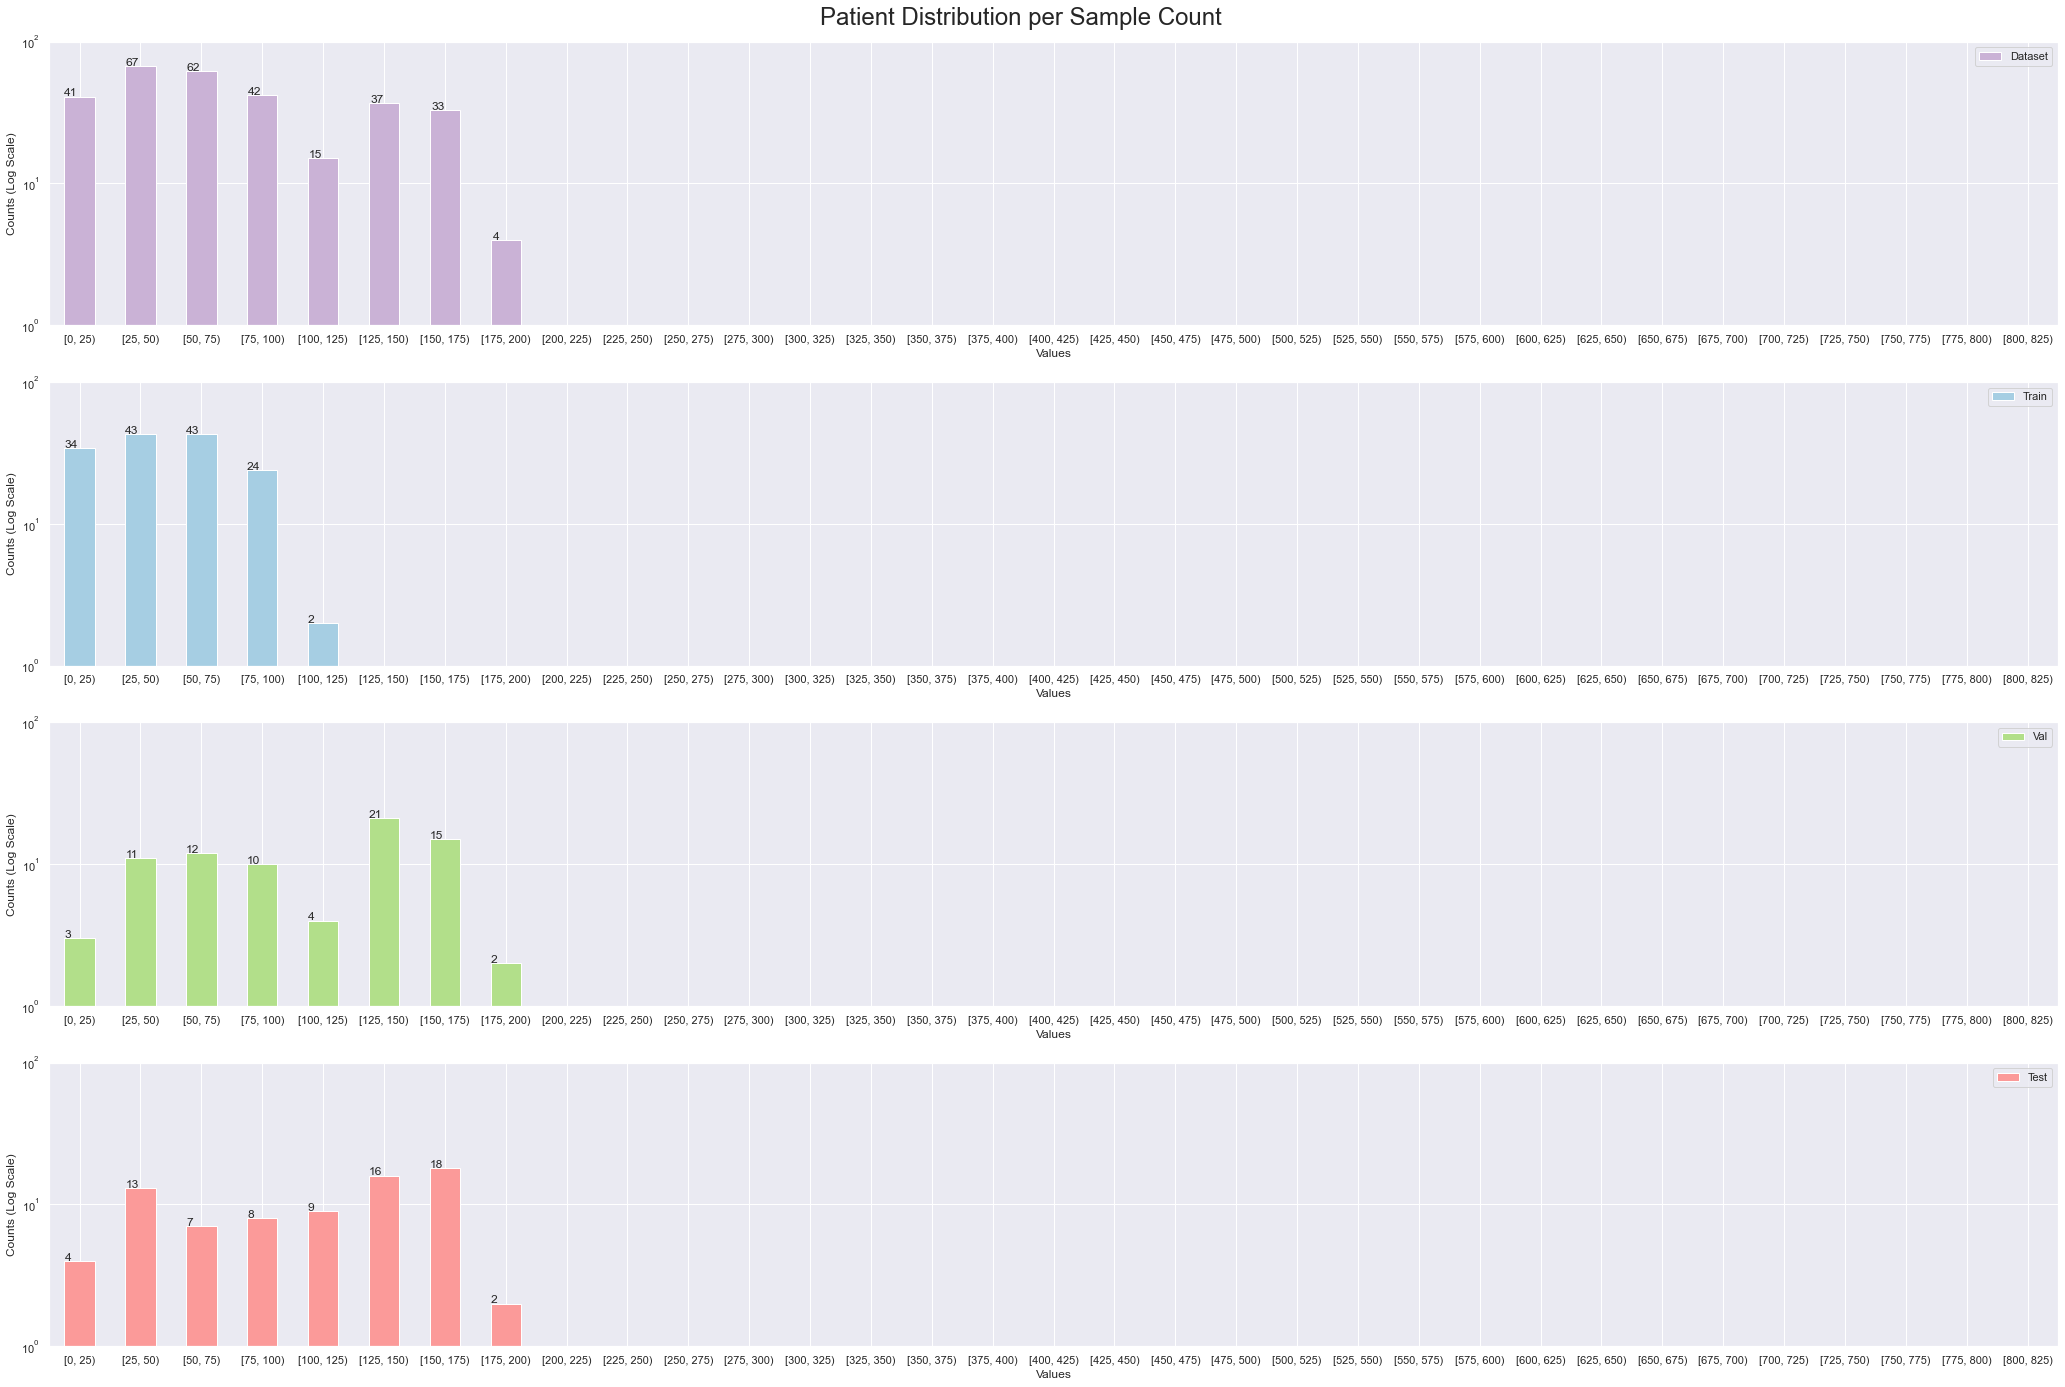

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

Dataset  Train  Val  Test
Values                               
[0, 25)          41     34    3     4
[25, 50)         67     43   11    13
[50, 75)         62     43   12     7
[75, 100)        42     24   10     8
[100, 125)       15      2    4     9
[125, 150)       37      0   21    16
[150, 175)       33      0   15    18
[175, 200)        4      0    2     2
[200, 225)        0      0    0     0
[225, 250)        0      0    0     0
[250, 275)        0      0    0     0
[275, 300)        0      0    0     0
[300, 325)        0      0    0     0
[325, 350)        0      0    0     0
[350, 375)        0      0    0     0
[375, 400)        0      0    0     0
[400, 425)        0      0    0     0
[425, 450)        0      0    0     0
[450, 475)        0      0    0     0
[475, 500)        0      0    0     0
[500, 525)        0      0    0     0
[525, 550)        0      0    0     0
[550, 575)        0      0    0     0
[575, 600)        0      0    0     0
[600, 625)        0      0    0     0
[625, 650)        0      0    0     0
[650, 675)        0      0    0     0
[675, 700)        0      0    0     0
[700, 725)        0      0    0     0
[725, 750)        0      0    0     0
[750, 775)        0      0    0     0
[775, 800)        0      0    0     0
[800, 825)        0      0    0     0
SUM             301    146   78    77

# Plots

## Class

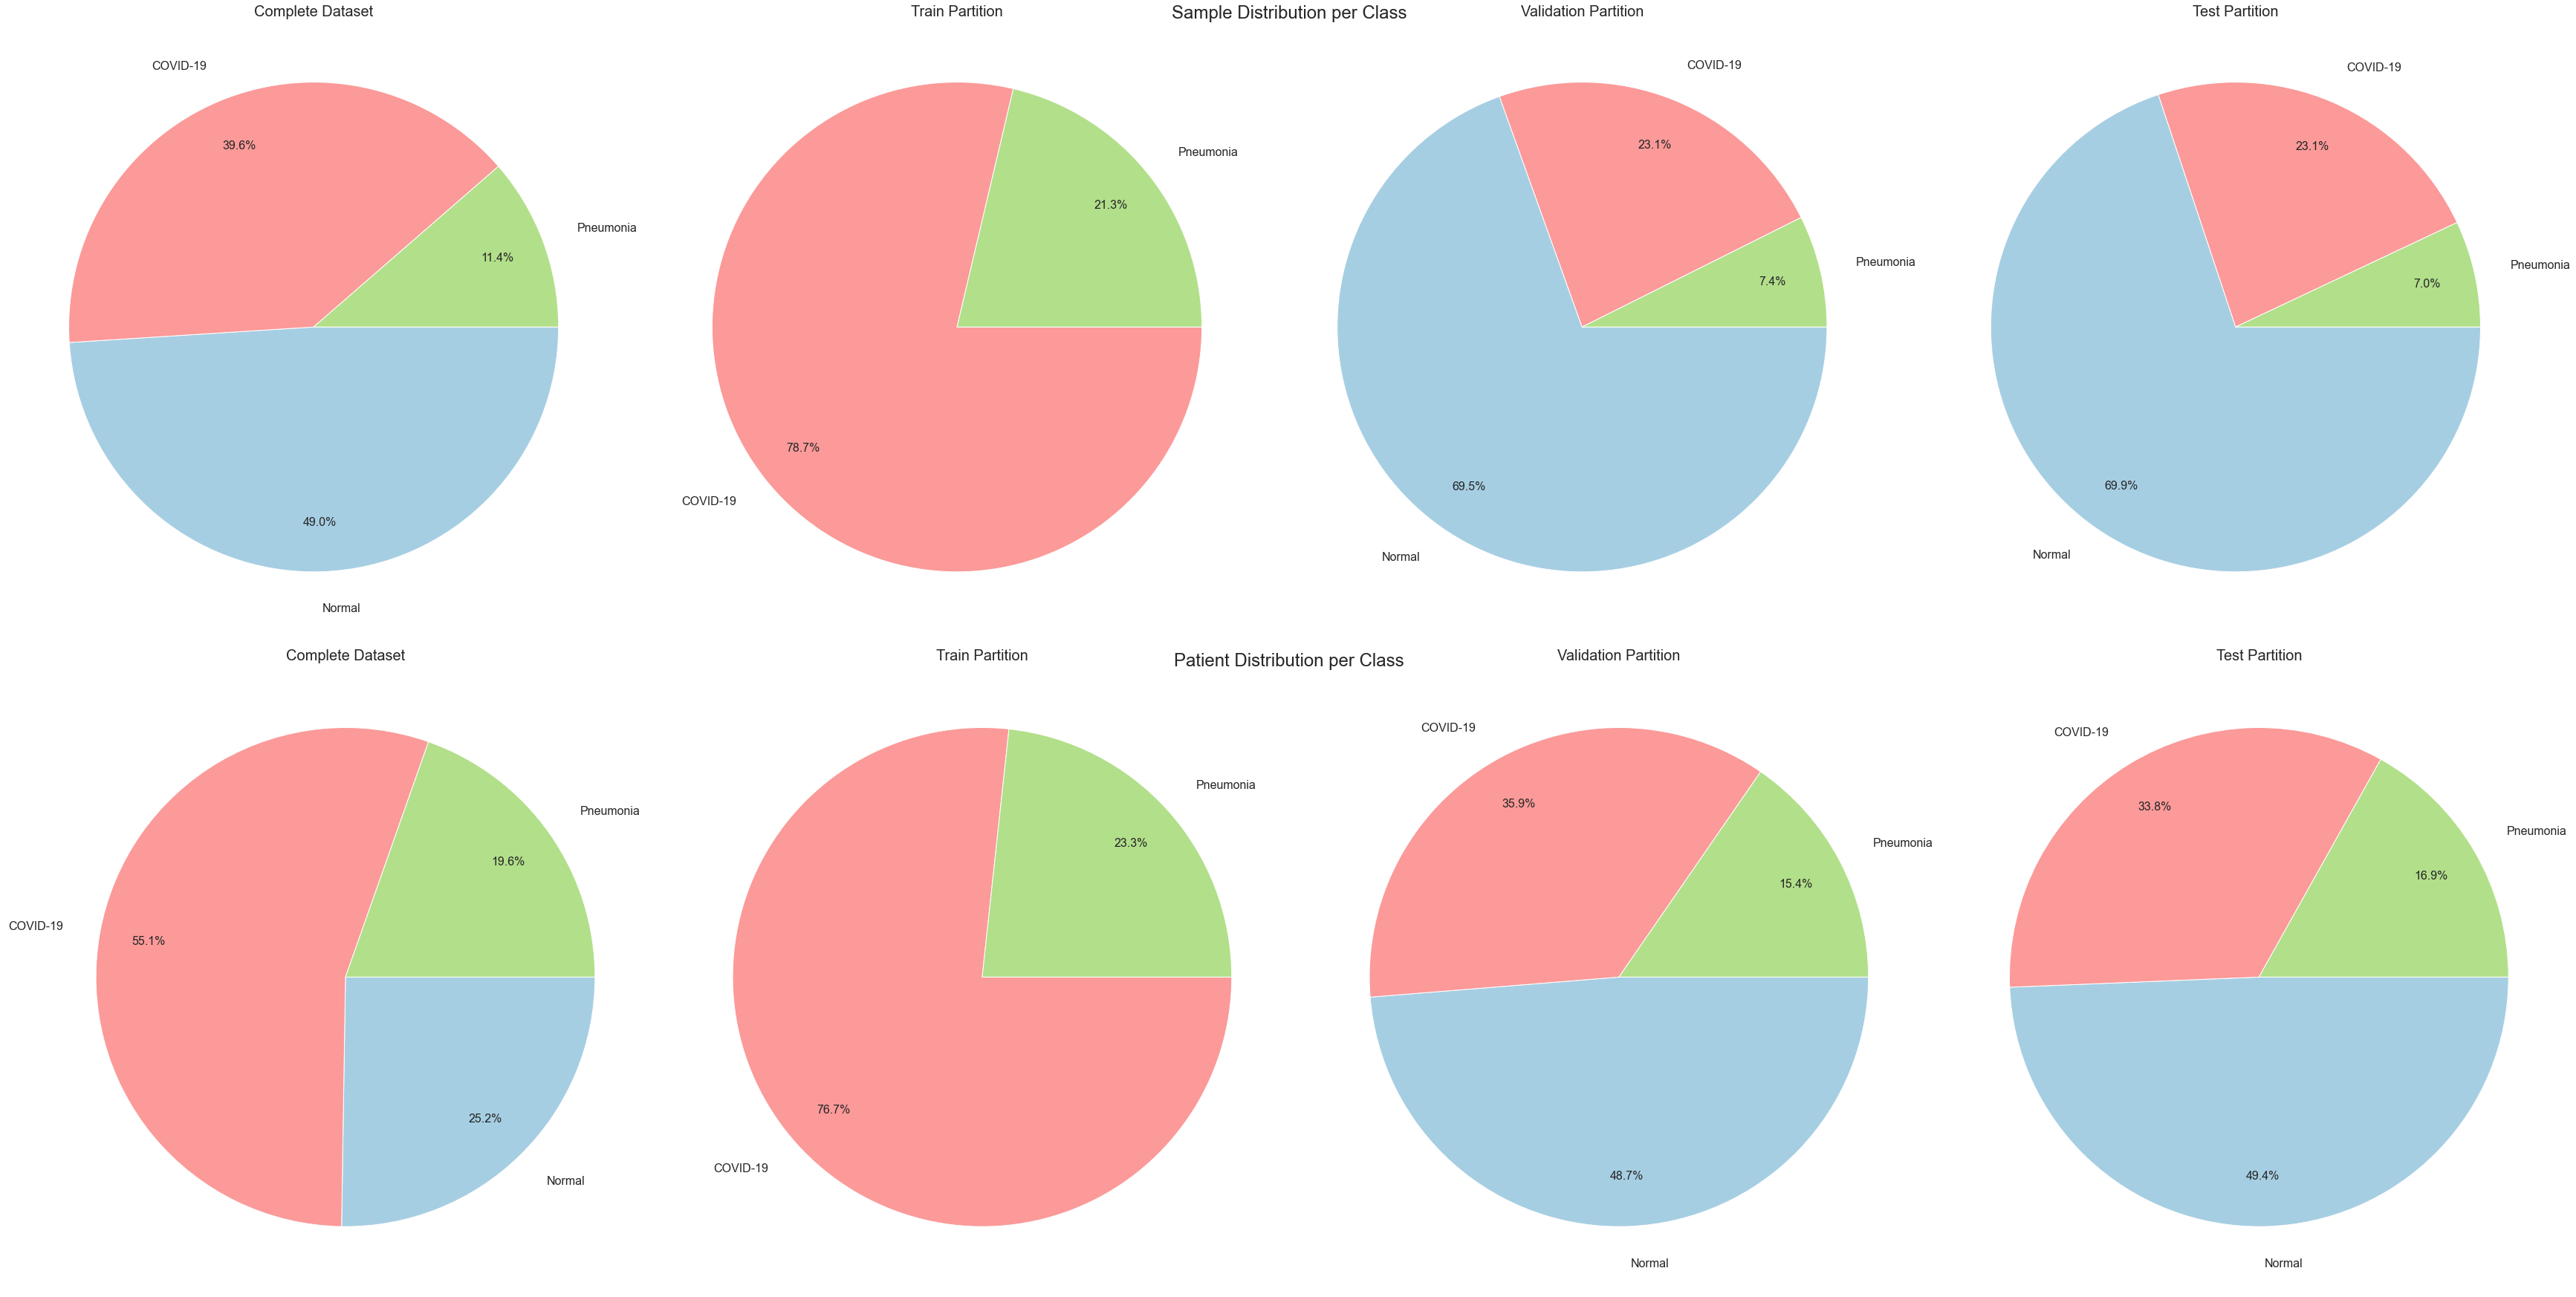

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 9223 
 5444 
 1903 
 1876 
 
 
 Normal 
 11405 
 0 
 5728 
 5677 
 
 
 Pneumonia 
 2652 
 1474 
 608 
 570 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 166 
 112 
 28 
 26 
 
 
 Pneumonia 
 59 
 34 
 12 
 13 
 
 
 Normal 
 76 
 0 
 38 
 38 
 
 
 SUM 
 301 
 146 
 78 
 77

## Age

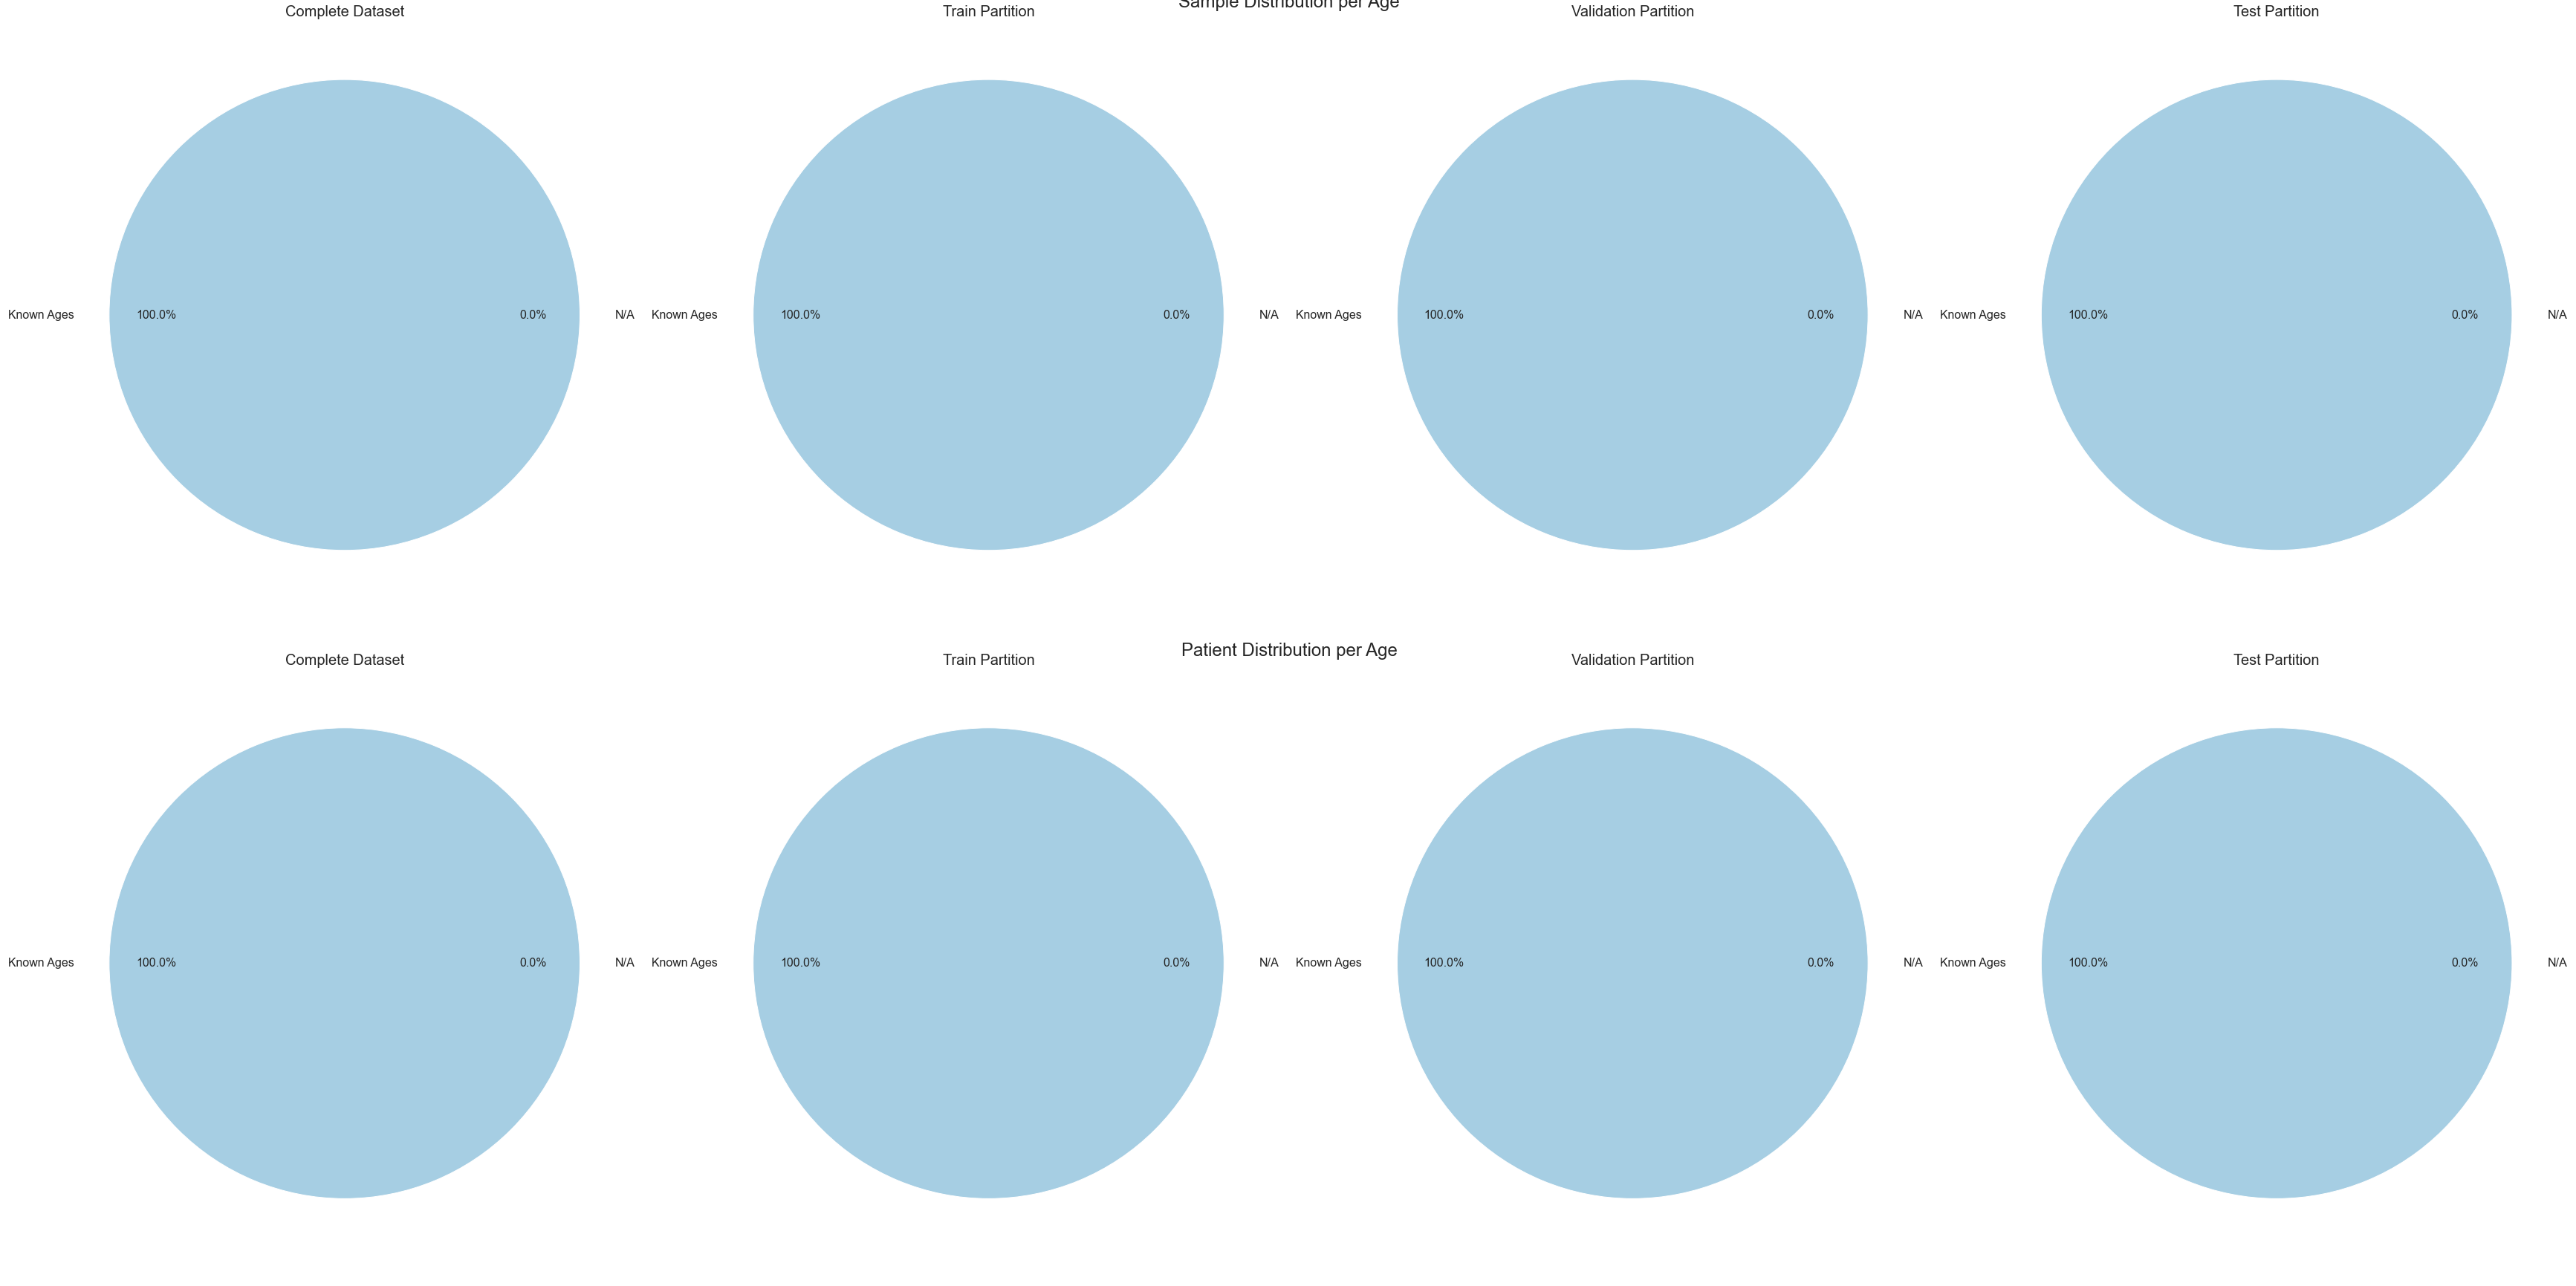

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Known Ages 
 23280 
 6918 
 8239 
 8123 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Known Ages 
 301 
 146 
 78 
 77 
 
 
 SUM 
 301 
 146 
 78 
 77

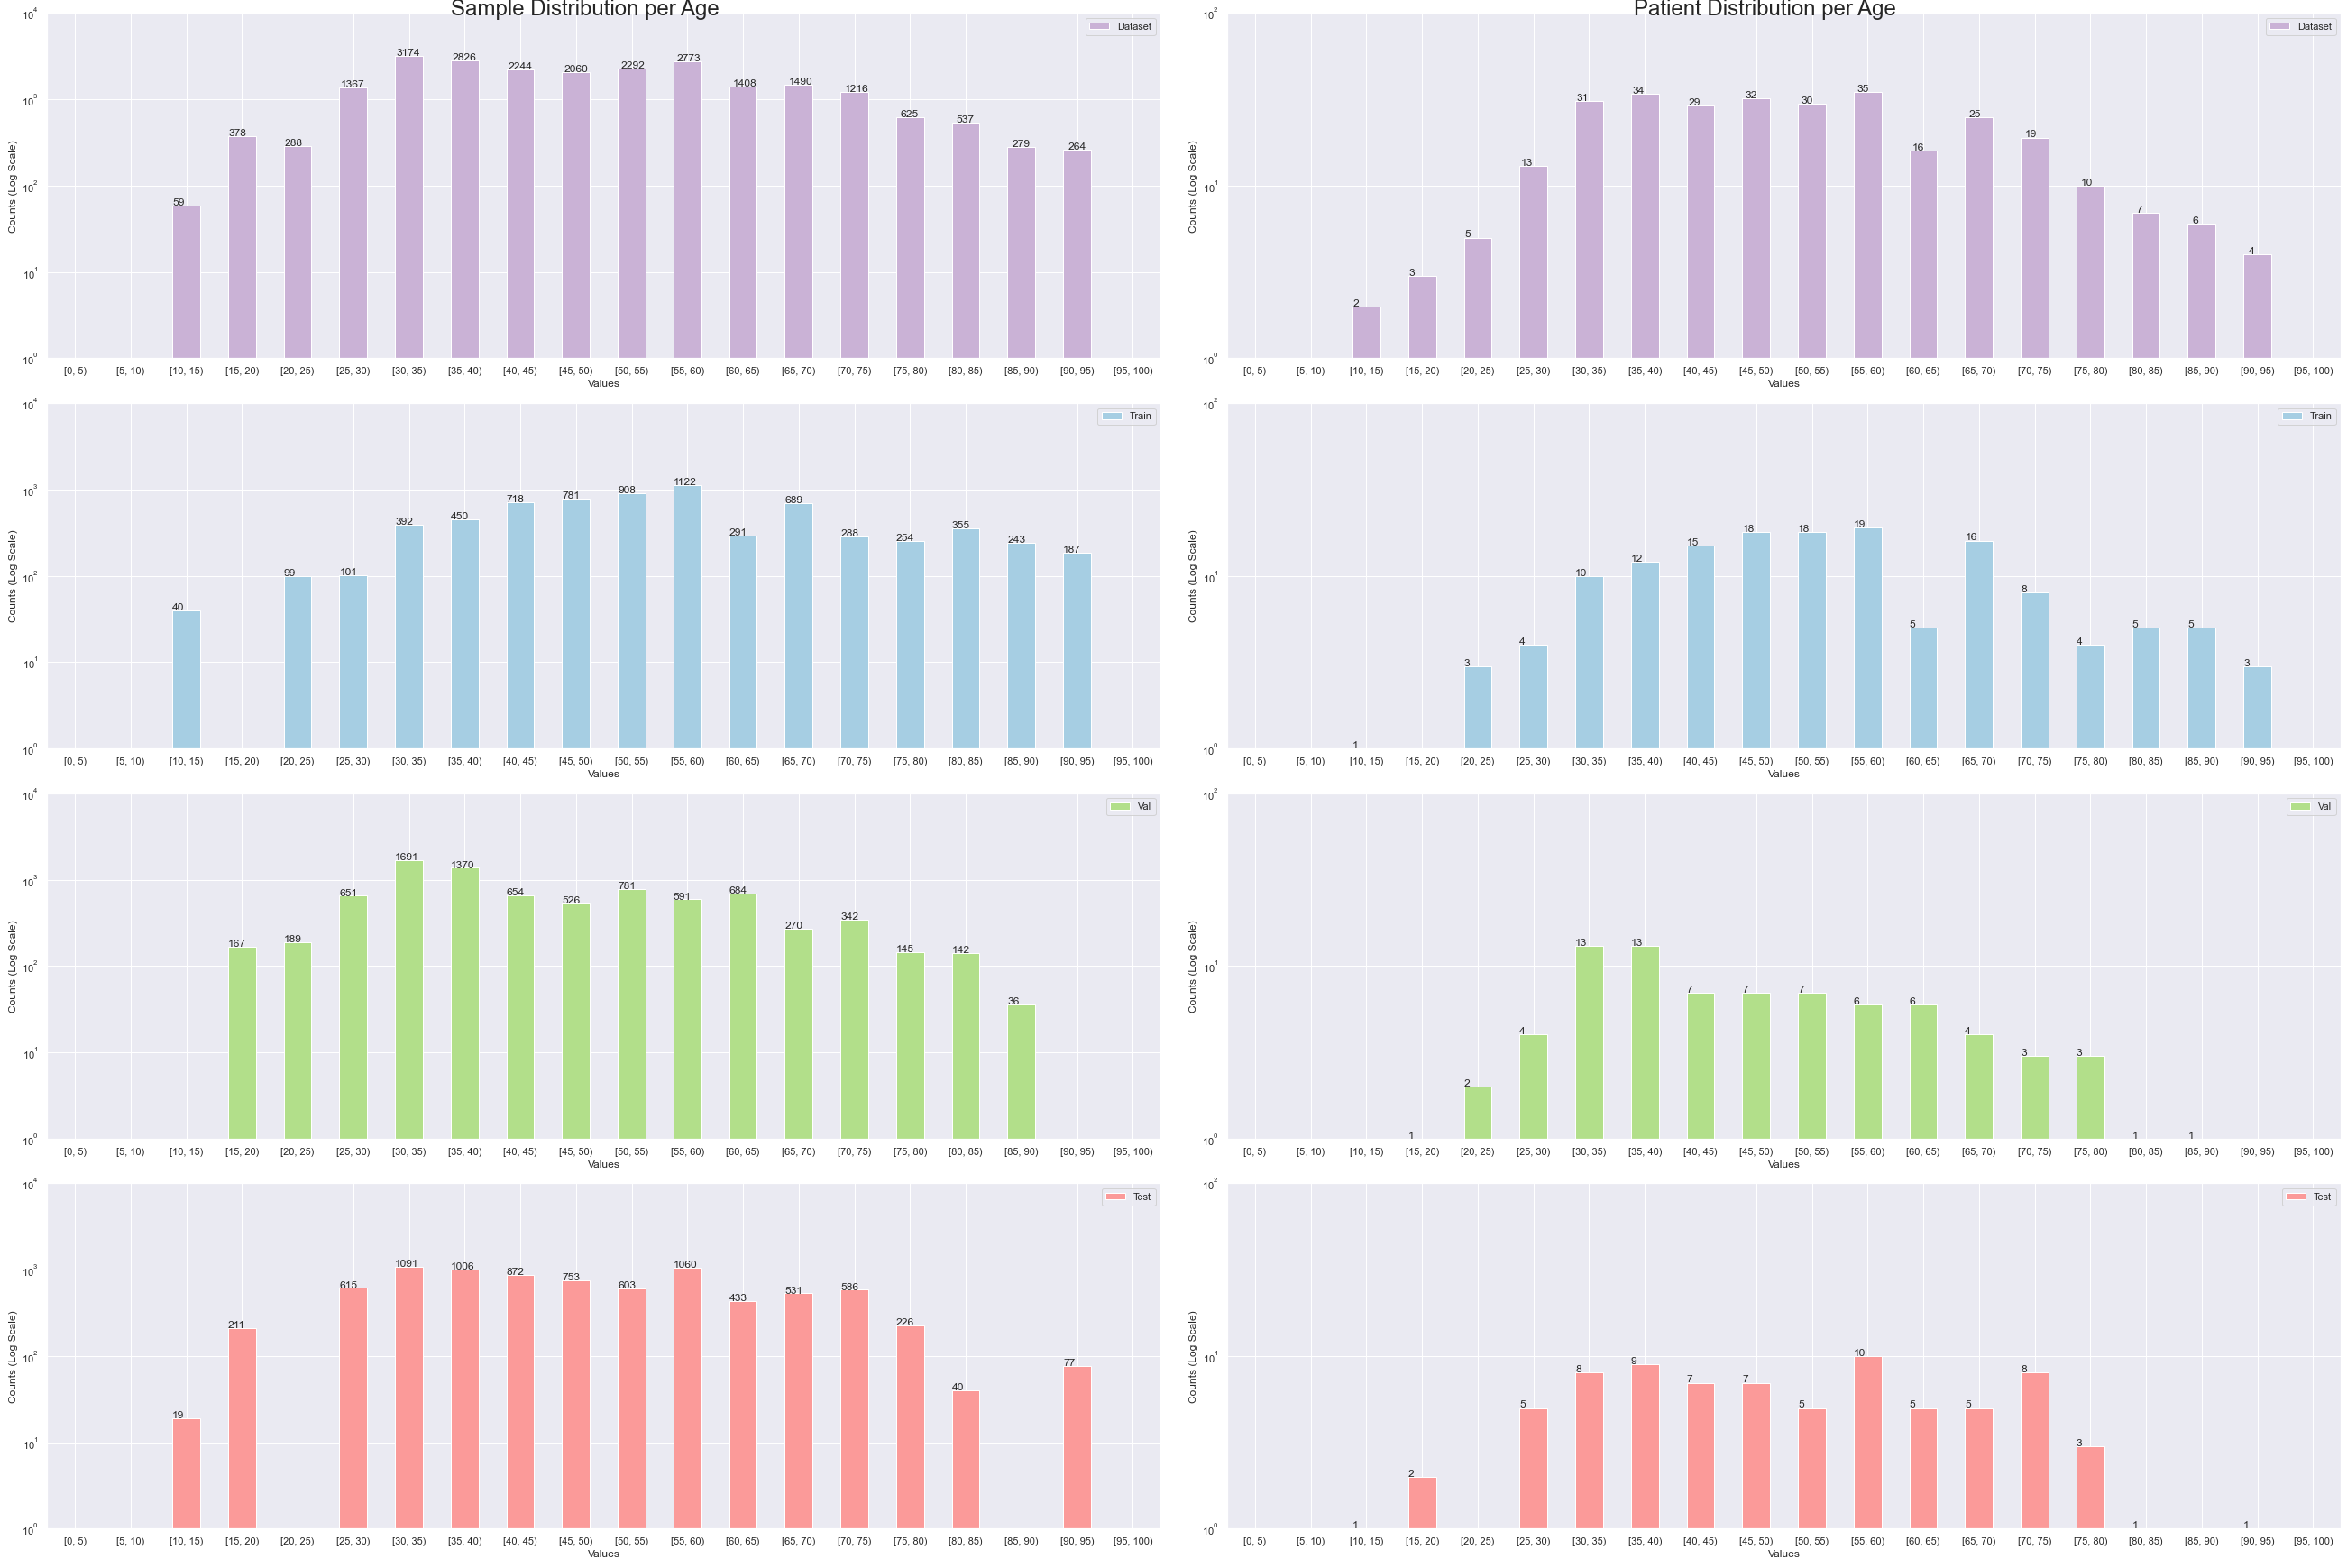

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 59 
 40 
 0 
 19 
 
 
 [15, 20) 
 378 
 0 
 167 
 211 
 
 
 [20, 25) 
 288 
 99 
 189 
 0 
 
 
 [25, 30) 
 1367 
 101 
 651 
 615 
 
 
 [30, 35) 
 3174 
 392 
 1691 
 1091 
 
 
 [35, 40) 
 2826 
 450 
 1370 
 1006 
 
 
 [40, 45) 
 2244 
 718 
 654 
 872 
 
 
 [45, 50) 
 2060 
 781 
 526 
 753 
 
 
 [50, 55) 
 2292 
 908 
 781 
 603 
 
 
 [55, 60) 
 2773 
 1122 
 591 
 1060 
 
 
 [60, 65) 
 1408 
 291 
 684 
 433 
 
 
 [65, 70) 
 1490 
 689 
 270 
 531 
 
 
 [70, 75) 
 1216 
 288 
 342 
 586 
 
 
 [75, 80) 
 625 
 254 
 145 
 226 
 
 
 [80, 85) 
 537 
 355 
 142 
 40 
 
 
 [85, 90) 
 279 
 243 
 36 
 0 
 
 
 [90, 95) 
 264 
 187 
 0 
 77 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 2 
 1 
 0 
 1 
 
 
 [15, 20) 
 3 
 0 
 1 
 2 
 
 
 [20, 25) 
 5 
 3 
 2 
 0 
 
 
 [25, 30) 
 13 
 4 
 4 
 5 
 
 
 [30, 35) 
 31 
 10 
 13 
 8 
 
 
 [35, 40) 
 34 
 12 
 13 
 9 
 
 
 [40, 45) 
 29 
 15 
 7 
 7 
 
 
 [45, 50) 
 32 
 18 
 7 
 7 
 
 
 [50, 55) 
 30 
 18 
 7 
 5 
 
 
 [55, 60) 
 35 
 19 
 6 
 10 
 
 
 [60, 65) 
 16 
 5 
 6 
 5 
 
 
 [65, 70) 
 25 
 16 
 4 
 5 
 
 
 [70, 75) 
 19 
 8 
 3 
 8 
 
 
 [75, 80) 
 10 
 4 
 3 
 3 
 
 
 [80, 85) 
 7 
 5 
 1 
 1 
 
 
 [85, 90) 
 6 
 5 
 1 
 0 
 
 
 [90, 95) 
 4 
 3 
 0 
 1 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 301 
 146 
 78 
 77

## Sex

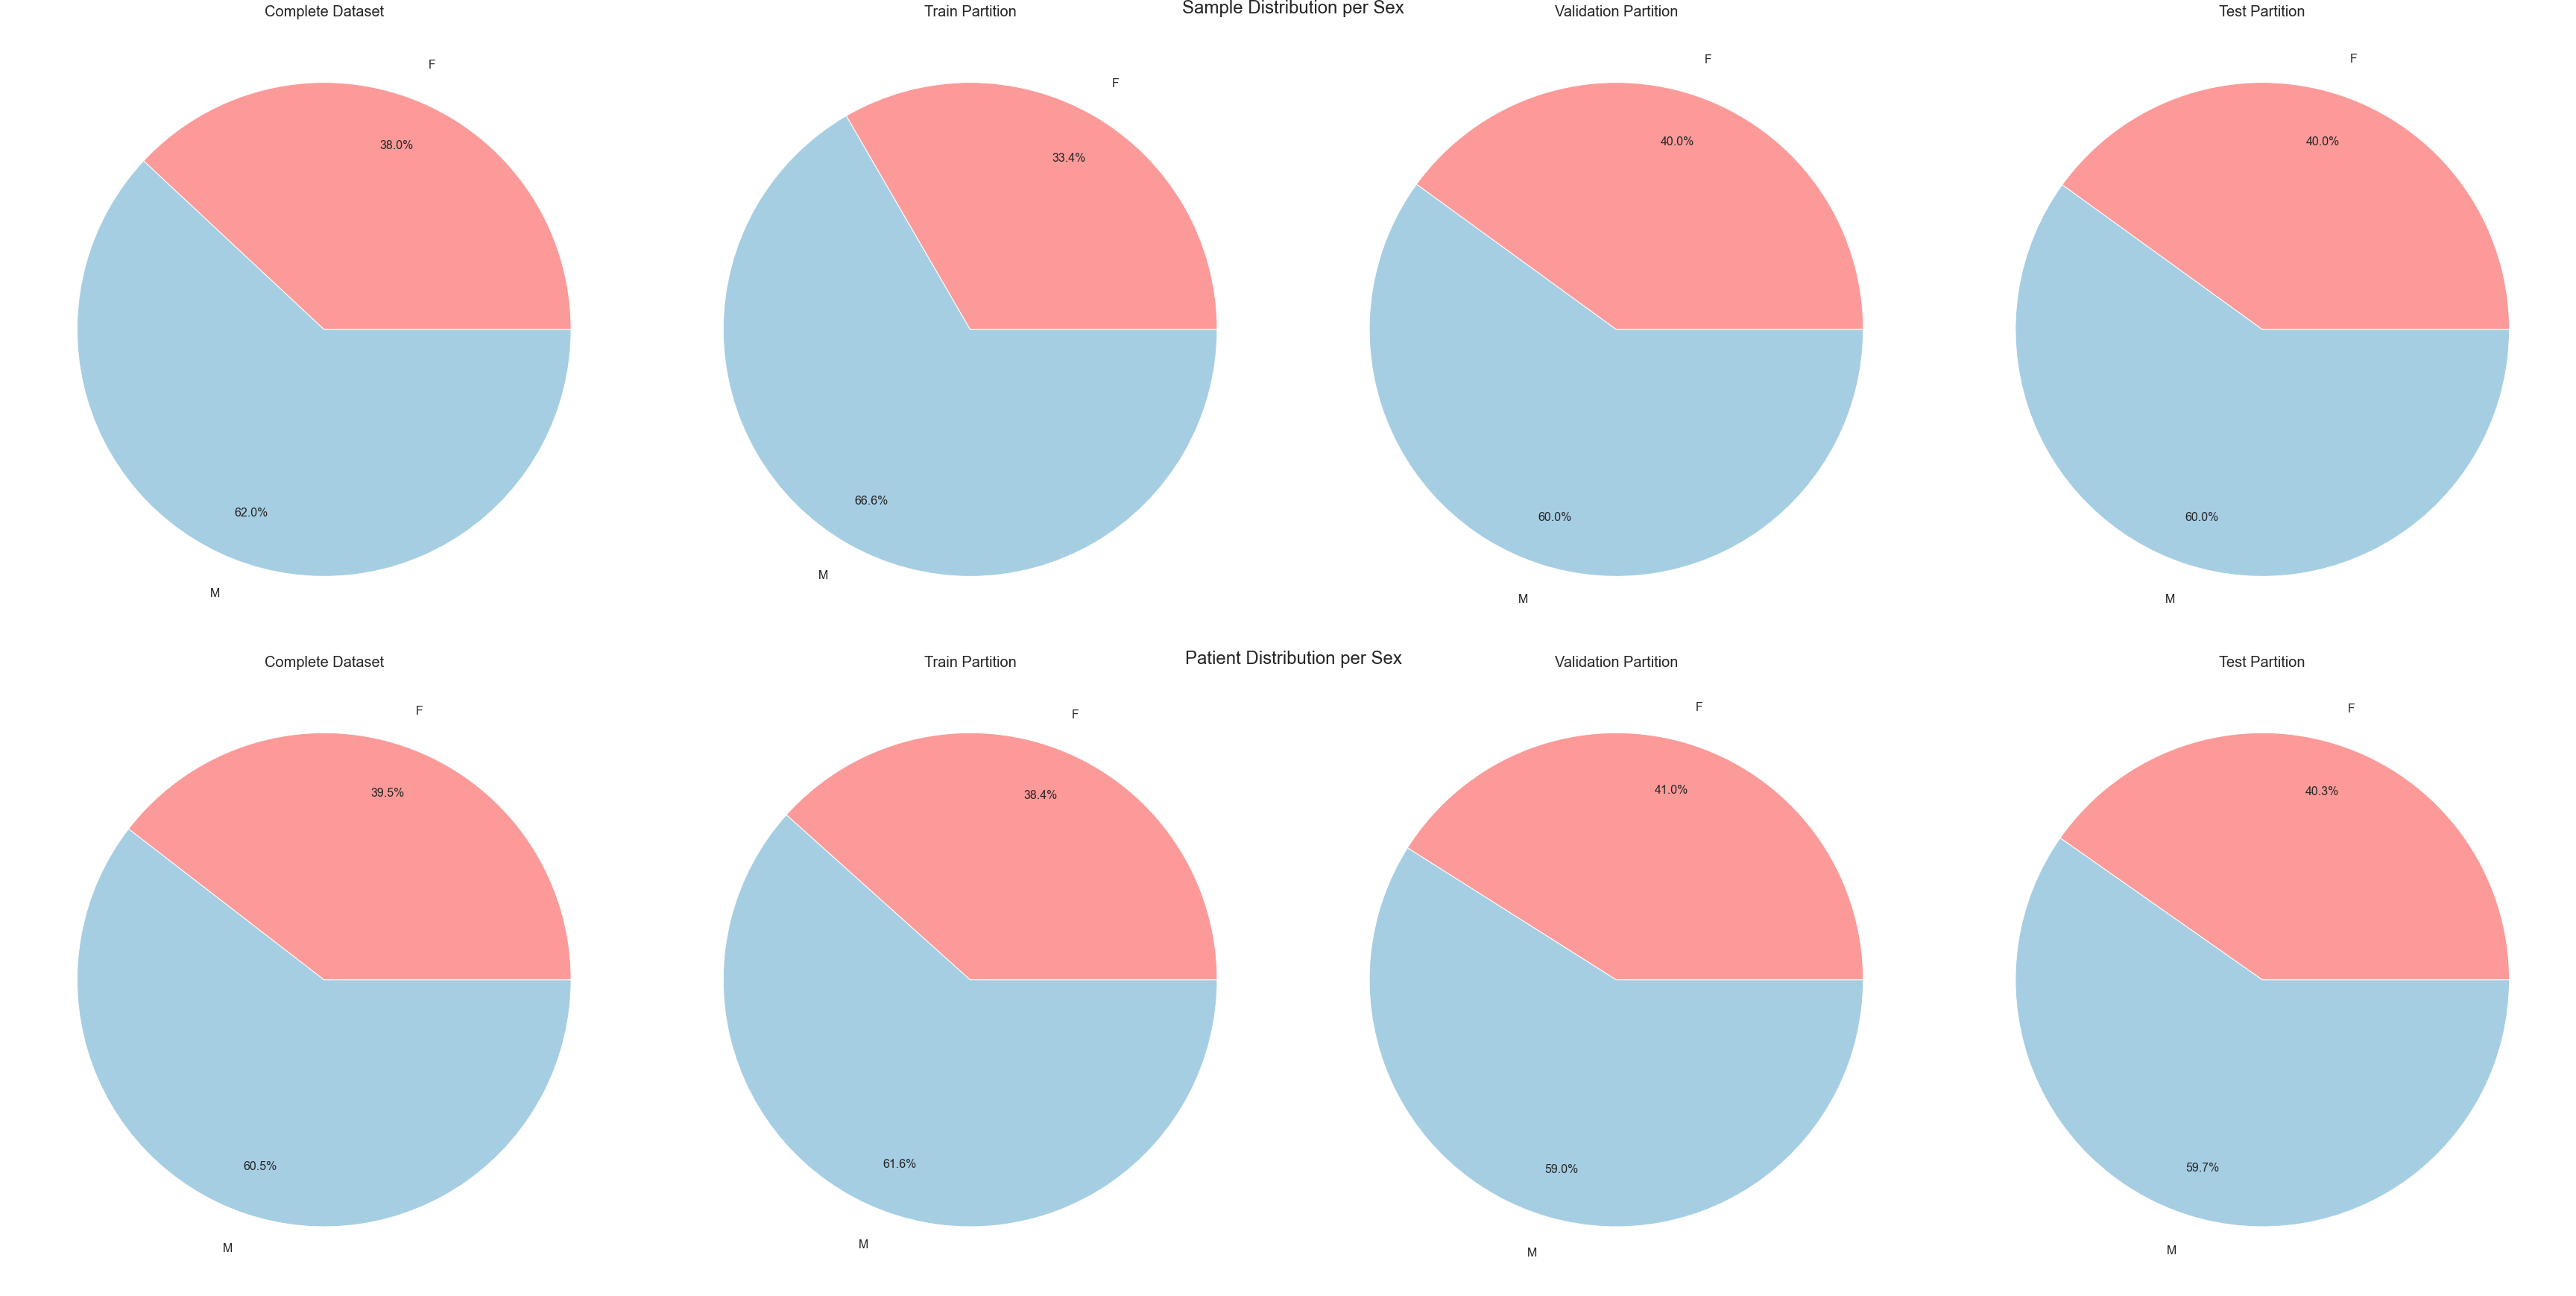

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 14425 
 4610 
 4944 
 4871 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 F 
 8855 
 2308 
 3295 
 3252 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 M 
 182 
 90 
 46 
 46 
 
 
 F 
 119 
 56 
 32 
 31 
 
 
 SUM 
 301 
 146 
 78 
 77

## Country

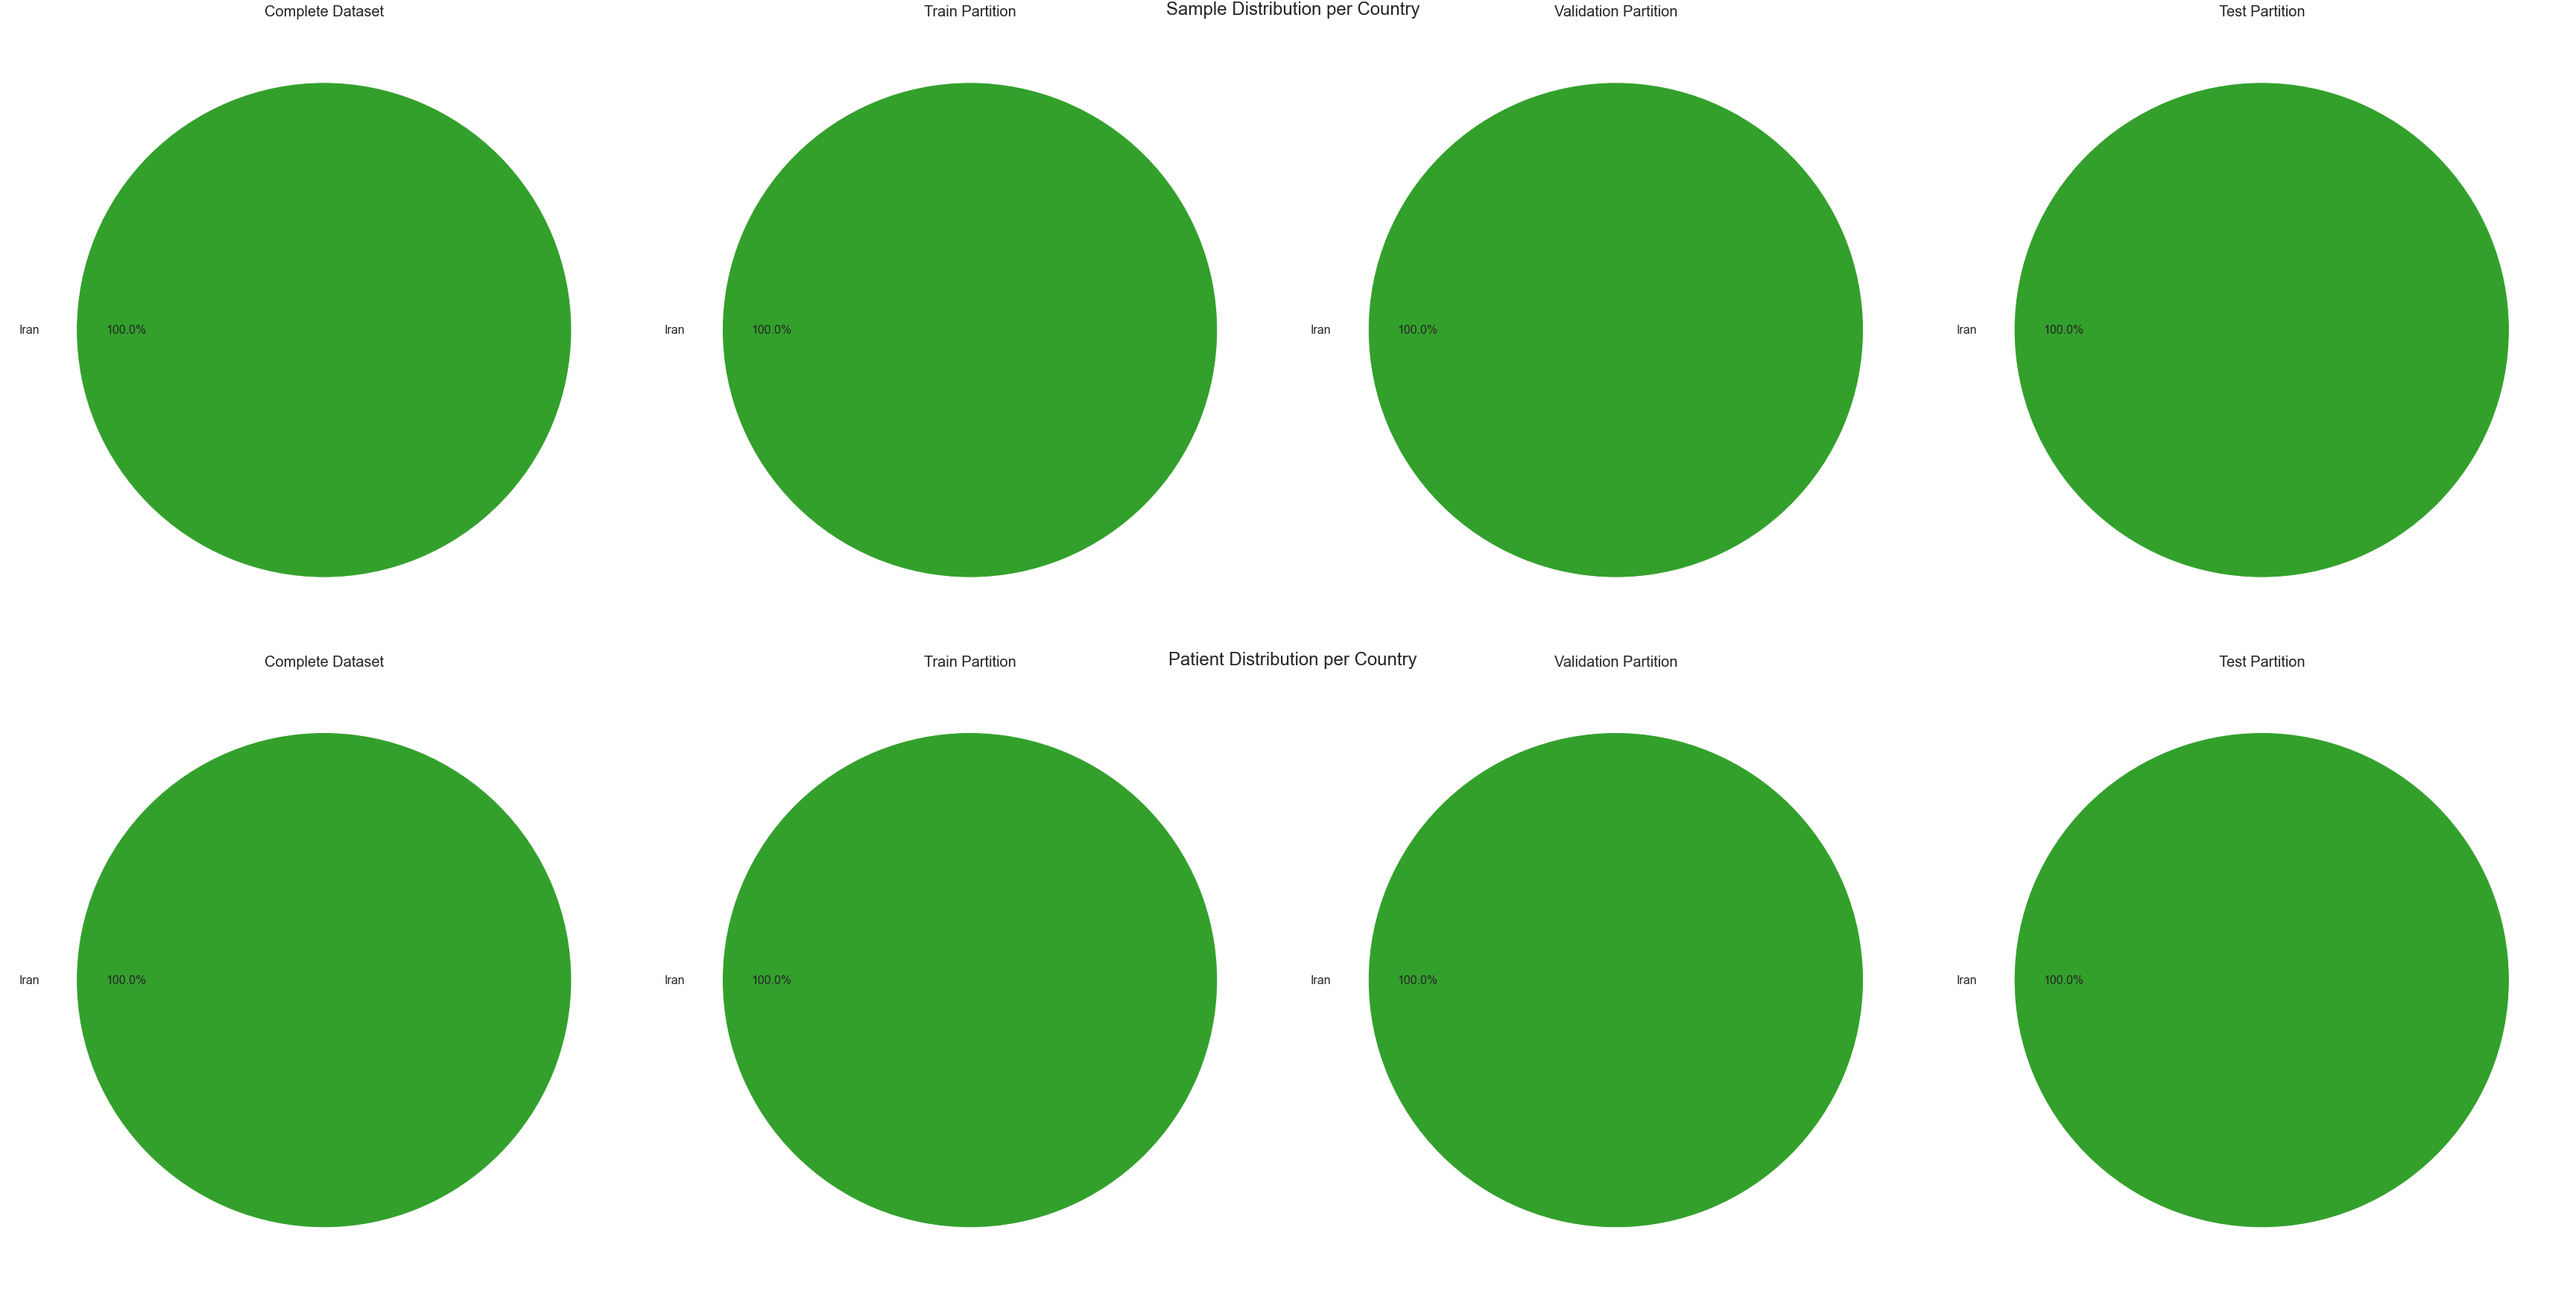

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 China 
 0 
 0 
 0 
 0 
 
 
 Iran 
 23280 
 6918 
 8239 
 8123 
 
 
 USA 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 China 
 0 
 0 
 0 
 0 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 Iran 
 301 
 146 
 78 
 77 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 USA 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 SUM 
 301 
 146 
 78 
 77

## Partition

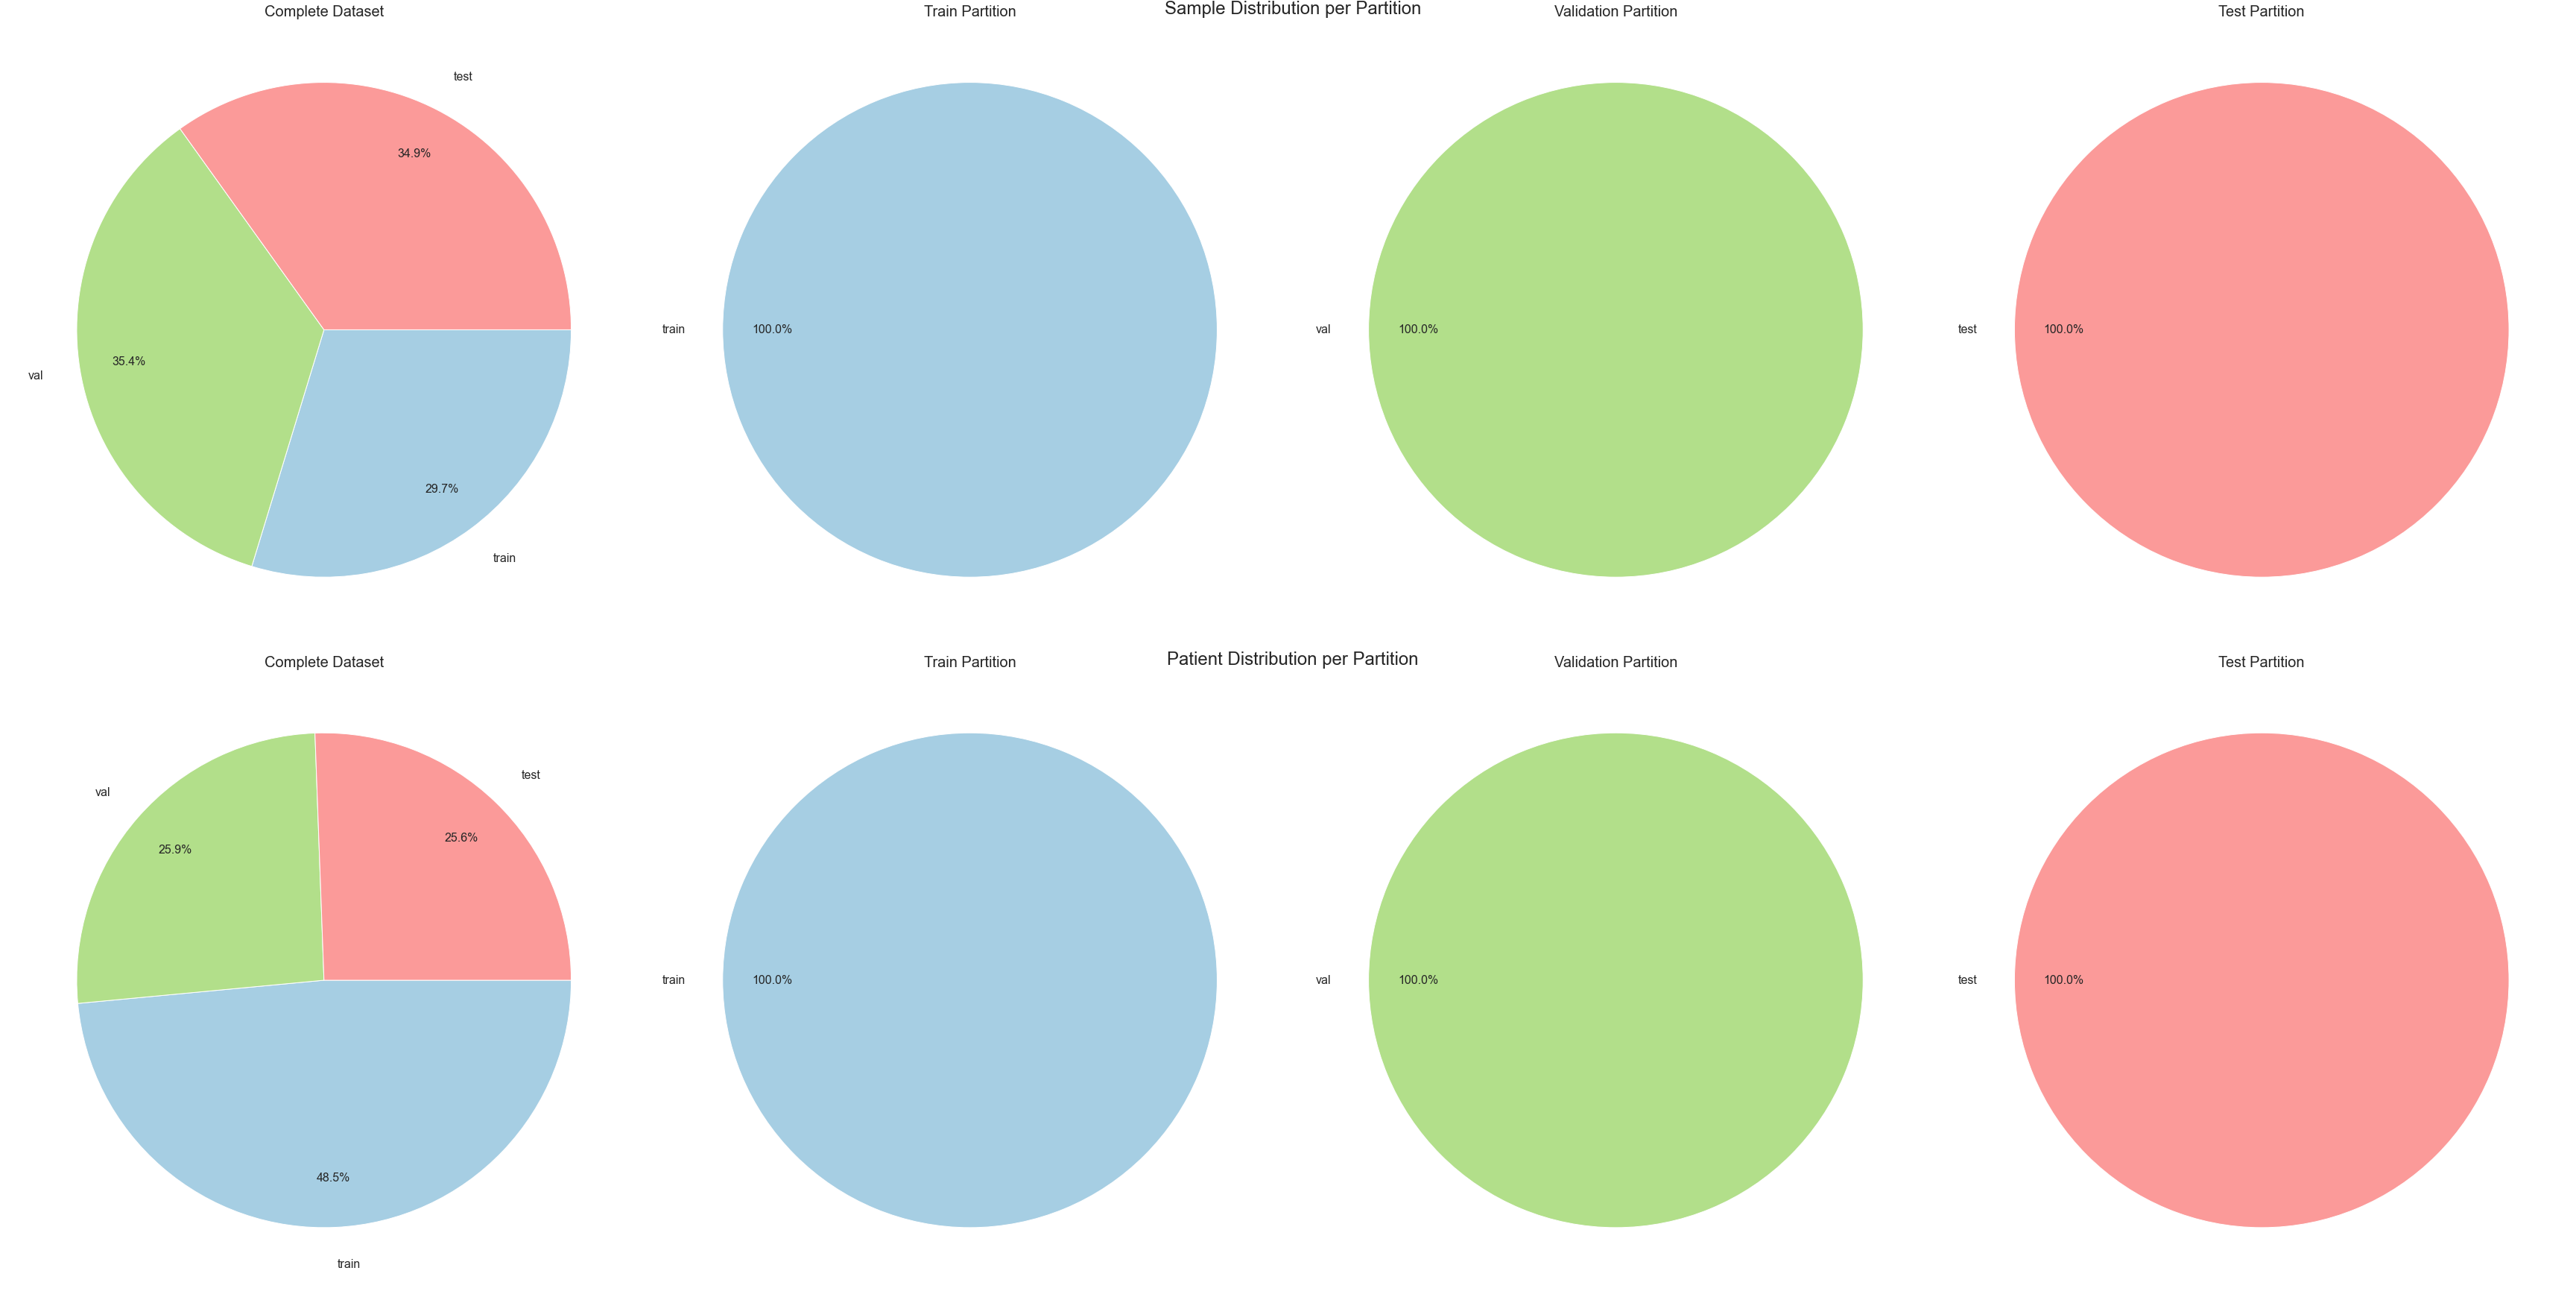

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 6918 
 6918 
 0 
 0 
 
 
 test 
 8123 
 0 
 0 
 8123 
 
 
 val 
 8239 
 0 
 8239 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 146 
 146 
 0 
 0 
 
 
 val 
 78 
 0 
 78 
 0 
 
 
 test 
 77 
 0 
 0 
 77 
 
 
 SUM 
 301 
 146 
 78 
 77

## Slice Selection

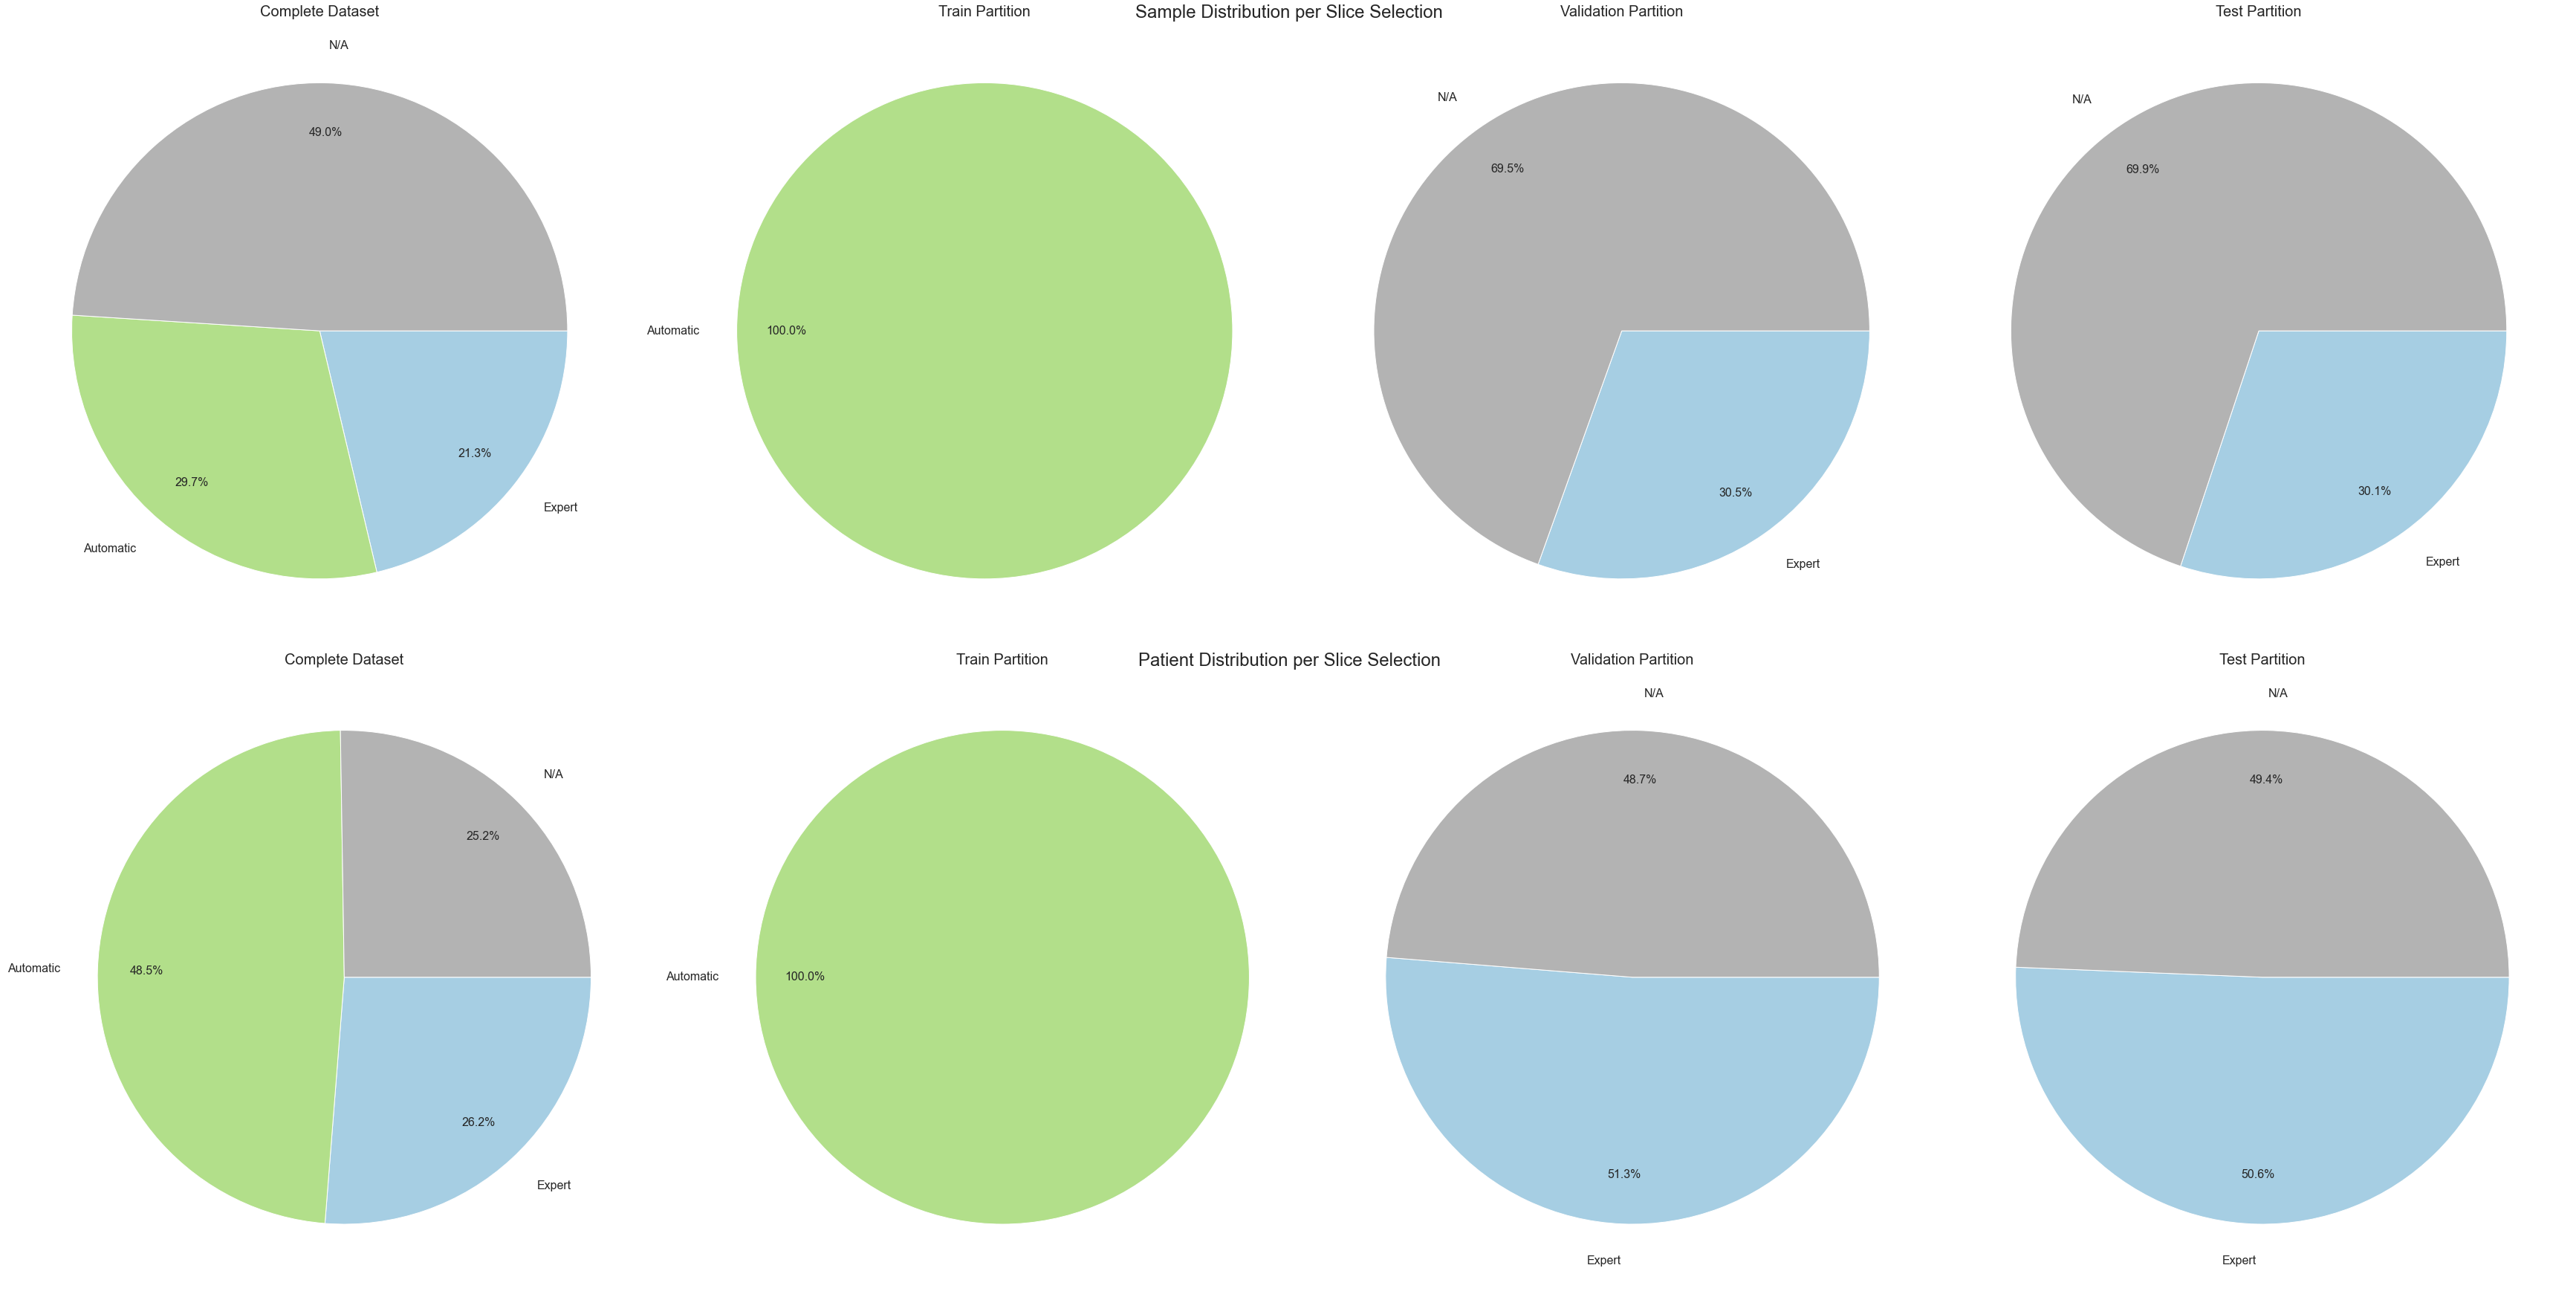

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 6918 
 6918 
 0 
 0 
 
 
 Expert 
 4957 
 0 
 2511 
 2446 
 
 
 N/A 
 11405 
 0 
 5728 
 5677 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 Patient Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 146 
 146 
 0 
 0 
 
 
 Expert 
 79 
 0 
 40 
 39 
 
 
 N/A 
 76 
 0 
 38 
 38 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 301 
 146 
 78 
 77

# Data Split

In [21]:
#new_samples_df, new_patient_df = split.dataset_by_samples( samples_df, patient_df, dataset_name, age_bin_len = 20, seed = 3 )
#new_samples_df, new_patient_df = split.dataset_by_samples( samples_df, patient_df, dataset_name, seed = 3 )
new_samples_df, new_patient_df = split.radiopaedia_dataset_by_samples( samples_df, patient_df, dataset_name, sample_frac = 0.2, seed = 20 )

    1/5: Group ('N/A', 'Normal', 'N/A', 'N/A', 'N/A')
	[Test] Moved 2221 samples (15 patients), expected 2281 samples, had 11405 samples (76 patients)...
		List of sample counts: [142, 155, 154, 155, 130, 168, 144, 164, 145, 137, 162, 134, 163, 123, 145, 159, 150, 156, 140, 112, 152, 169, 124, 140, 152, 143, 160, 145, 137, 145, 160, 118, 173, 147, 160, 166, 144, 151, 167, 146, 136, 156, 136, 142, 186, 144, 134, 172, 154, 143, 132, 148, 151, 174, 155, 142, 144, 139, 138, 126, 170, 128, 129, 149, 142, 185, 148, 167, 152, 162, 133, 159, 168, 176, 171, 177]
	[Val] Moved 2184 samples (15 patients), expected 2281 samples, had 9184 samples (61 patients)...
		List of sample counts: [159, 150, 156, 140, 112, 152, 169, 124, 140, 152, 143, 160, 145, 137, 145, 160, 118, 173, 147, 160, 166, 144, 151, 167, 146, 136, 156, 136, 142, 186, 144, 134, 172, 154, 143, 132, 148, 151, 174, 155, 142, 144, 139, 138, 126, 170, 128, 129, 149, 142, 185, 148, 167, 152, 162, 133, 159, 168, 176, 171, 177]



    2/5:

# Post Split Plots

## Class

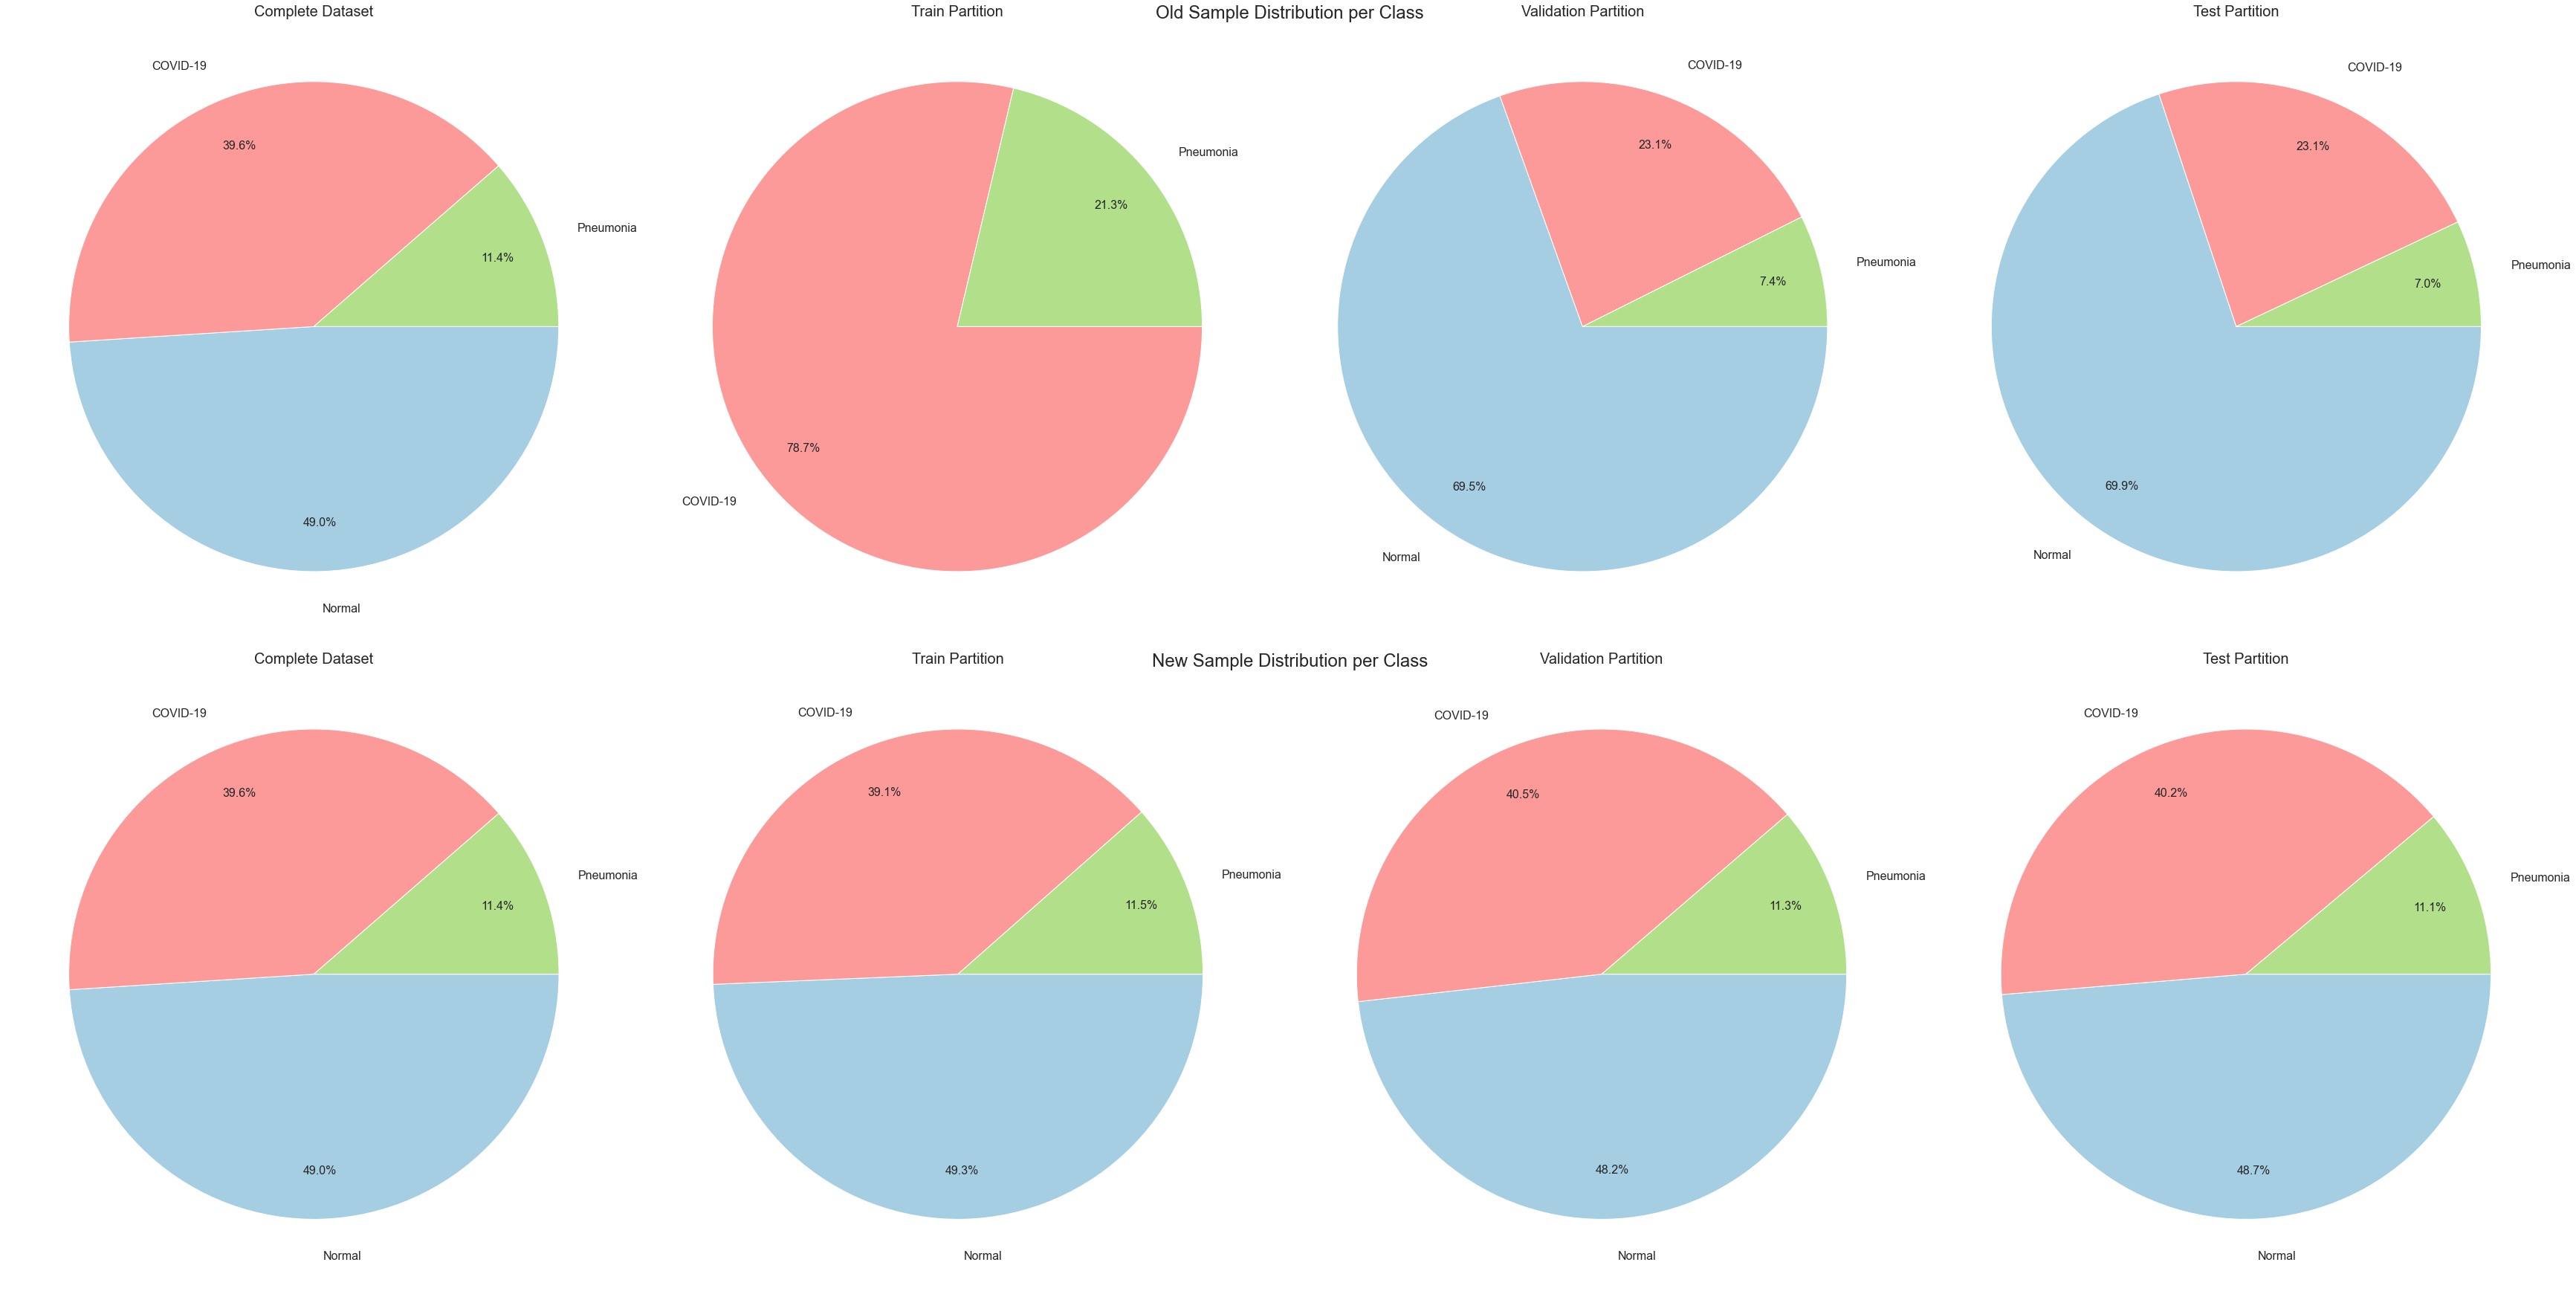

In [22]:
plot.column_as_pies( samples_df, new_samples_df, "class", dataset_name, figsize = (48, 24), resplit = True )

In [23]:
plot.column_as_table( samples_df, new_samples_df, "class", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 COVID-19 
 9223 
 5444 
 1903 
 1876 
 
 
 Normal 
 11405 
 0 
 5728 
 5677 
 
 
 Pneumonia 
 2652 
 1474 
 608 
 570 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Class 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Normal 
 11405 
 7000 
 2184 
 2221 
 
 
 COVID-19 
 9223 
 5554 
 1834 
 1835 
 
 
 Pneumonia 
 2652 
 1633 
 512 
 507 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

## Age

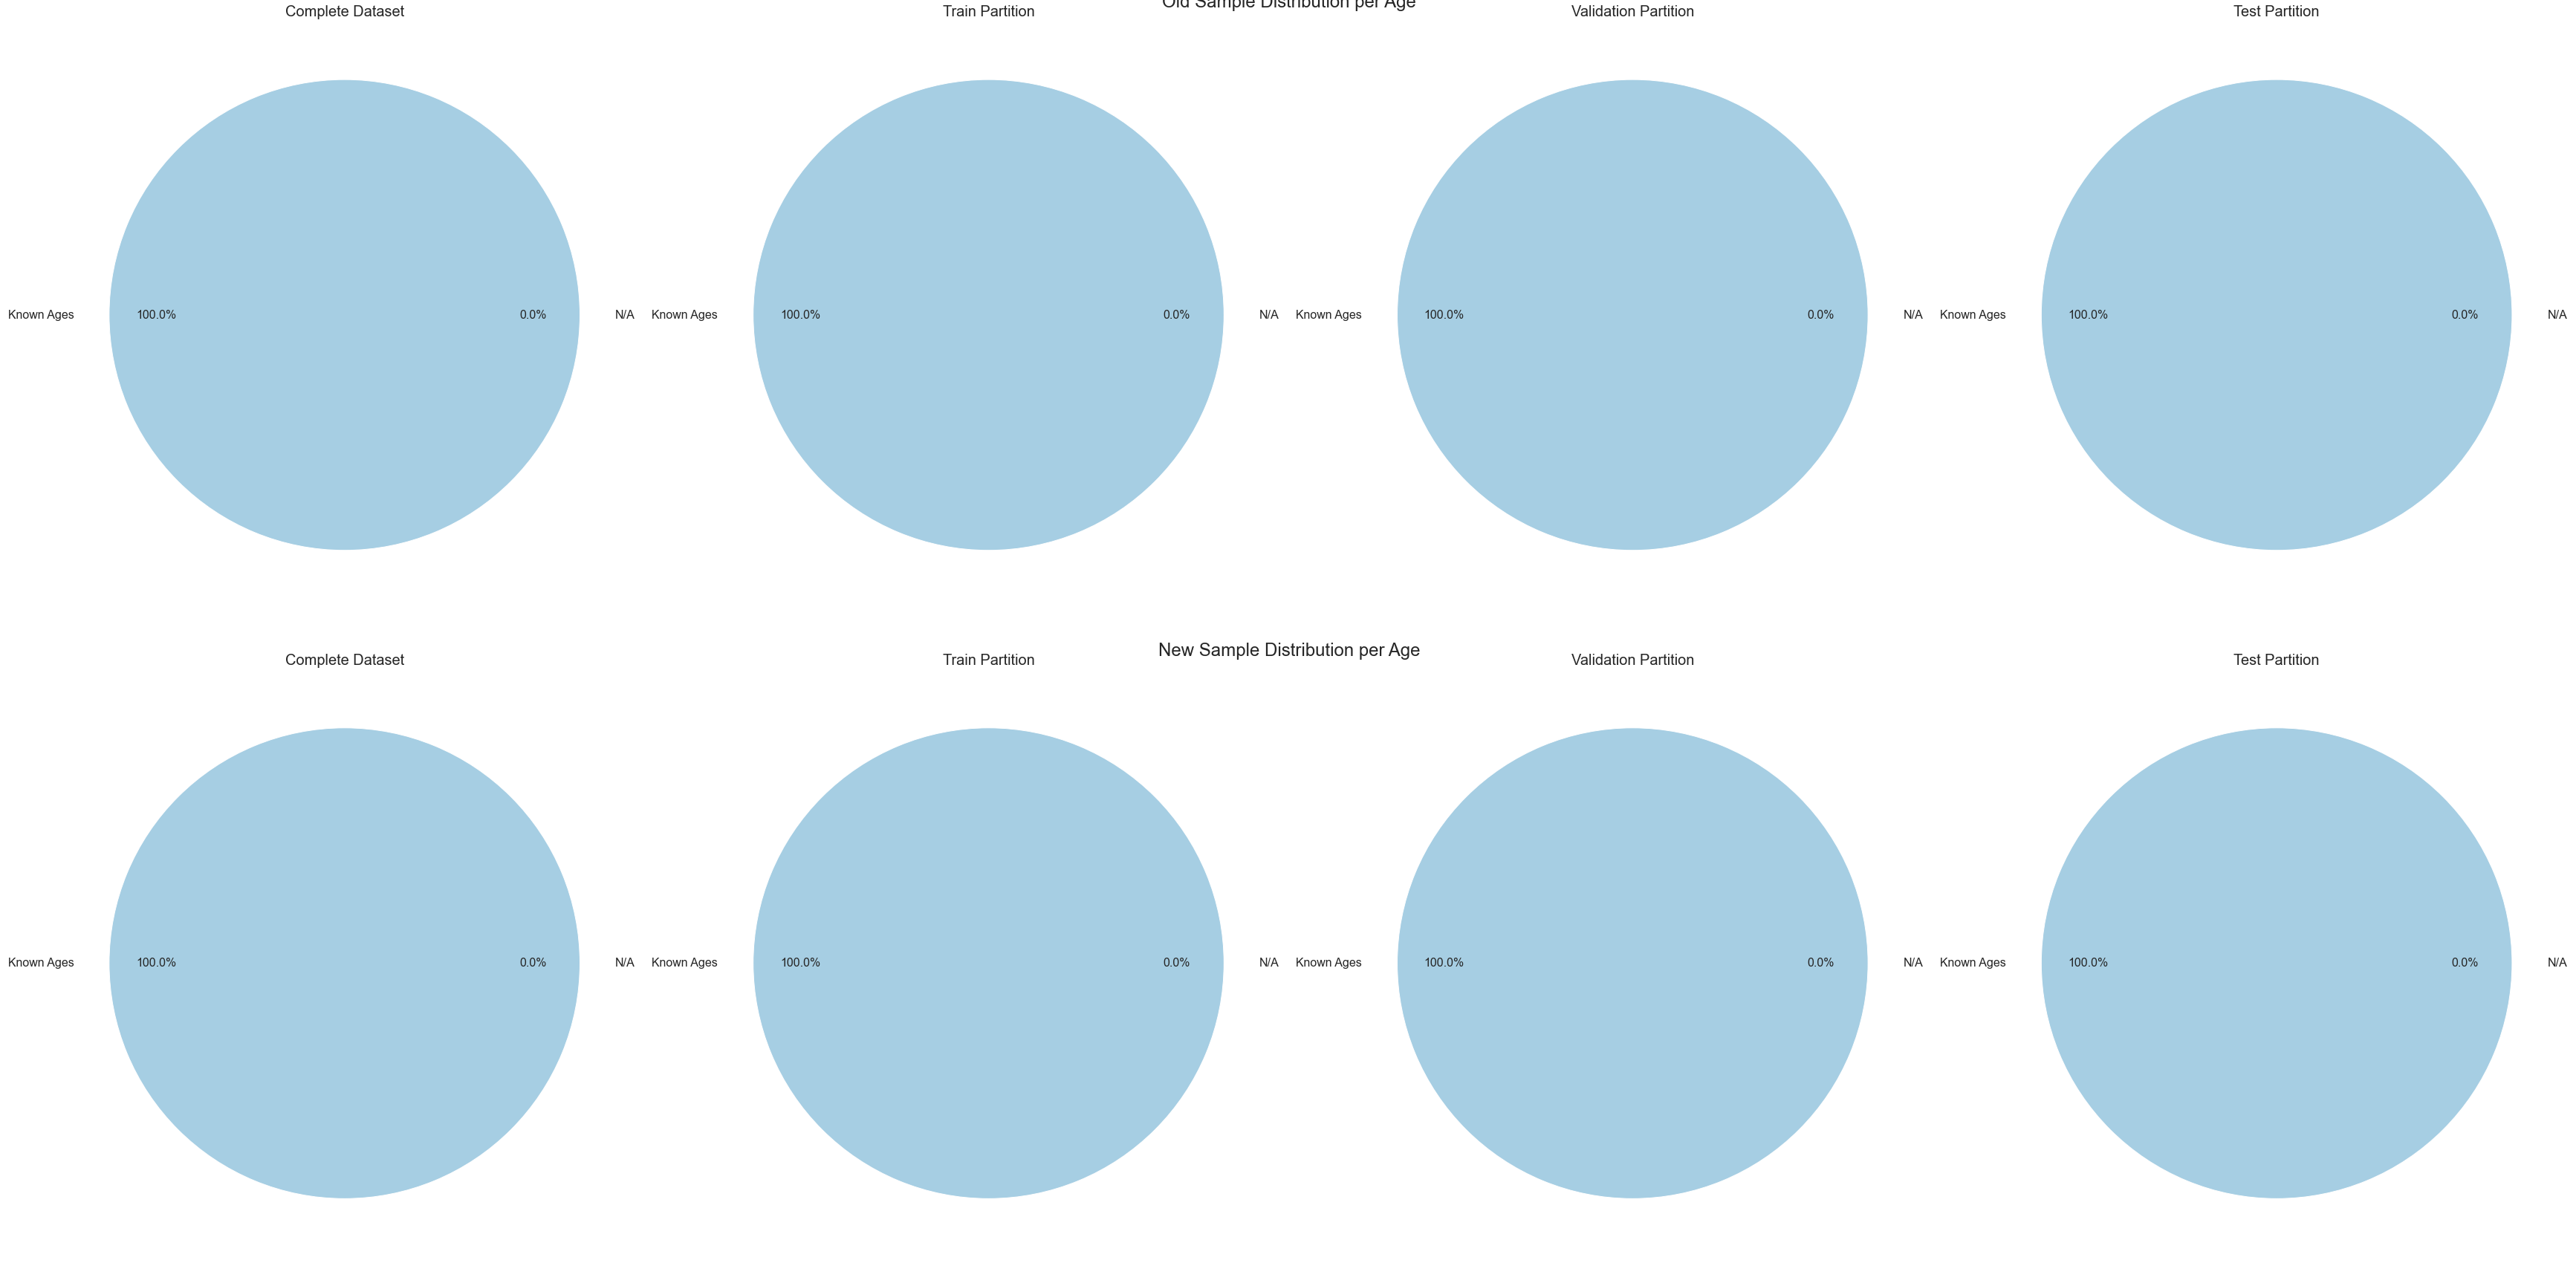

In [24]:
plot.column_as_pies( samples_df, new_samples_df, "age", dataset_name, figsize = (48, 24), resplit = True)

In [25]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Known Ages 
 23280 
 6918 
 8239 
 8123 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Known Ages 
 23280 
 14187 
 4530 
 4563 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

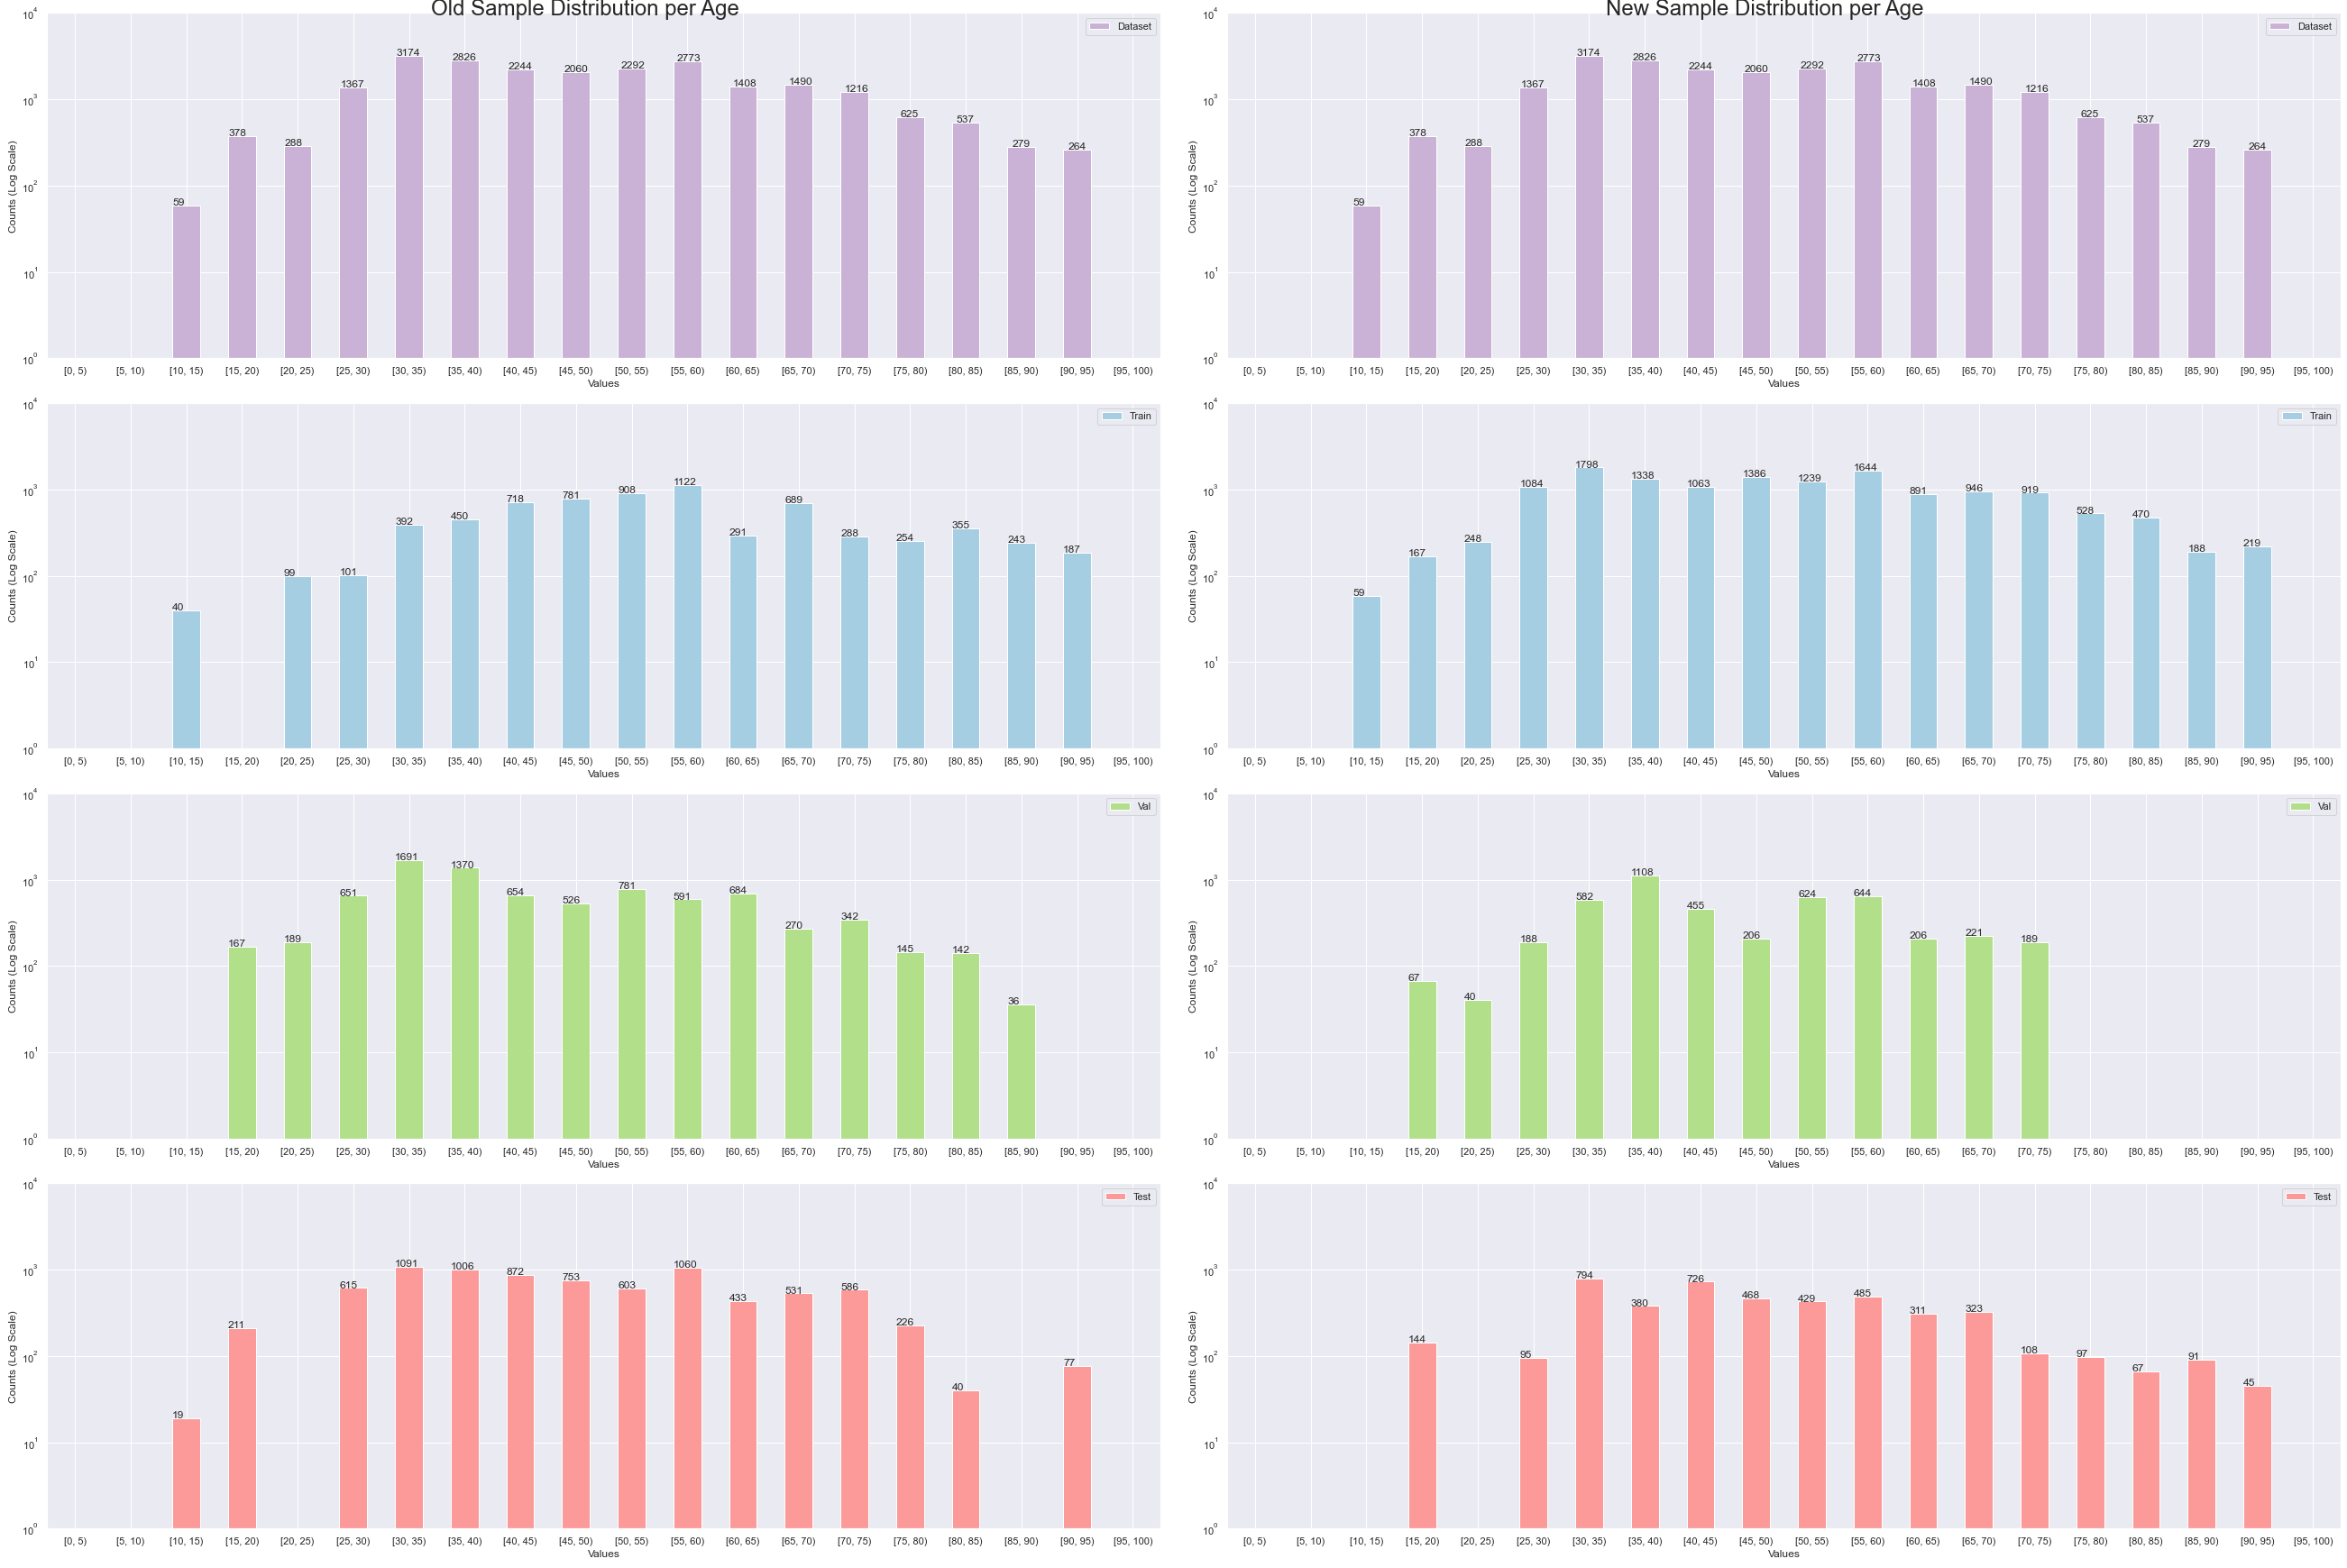

In [26]:
plot.column_as_histograms( samples_df, new_samples_df, "age", dataset_name, figsize = (36, 24), resplit = True)

In [27]:
plot.column_as_table( samples_df, new_samples_df, "age", dataset_name, bin_flag = True, resplit = True )

Old Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 59 
 40 
 0 
 19 
 
 
 [15, 20) 
 378 
 0 
 167 
 211 
 
 
 [20, 25) 
 288 
 99 
 189 
 0 
 
 
 [25, 30) 
 1367 
 101 
 651 
 615 
 
 
 [30, 35) 
 3174 
 392 
 1691 
 1091 
 
 
 [35, 40) 
 2826 
 450 
 1370 
 1006 
 
 
 [40, 45) 
 2244 
 718 
 654 
 872 
 
 
 [45, 50) 
 2060 
 781 
 526 
 753 
 
 
 [50, 55) 
 2292 
 908 
 781 
 603 
 
 
 [55, 60) 
 2773 
 1122 
 591 
 1060 
 
 
 [60, 65) 
 1408 
 291 
 684 
 433 
 
 
 [65, 70) 
 1490 
 689 
 270 
 531 
 
 
 [70, 75) 
 1216 
 288 
 342 
 586 
 
 
 [75, 80) 
 625 
 254 
 145 
 226 
 
 
 [80, 85) 
 537 
 355 
 142 
 40 
 
 
 [85, 90) 
 279 
 243 
 36 
 0 
 
 
 [90, 95) 
 264 
 187 
 0 
 77 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Age 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 [0, 5) 
 0 
 0 
 0 
 0 
 
 
 [5, 10) 
 0 
 0 
 0 
 0 
 
 
 [10, 15) 
 59 
 59 
 0 
 0 
 
 
 [15, 20) 
 378 
 167 
 67 
 144 
 
 
 [20, 25) 
 288 
 248 
 40 
 0 
 
 
 [25, 30) 
 1367 
 1084 
 188 
 95 
 
 
 [30, 35) 
 3174 
 1798 
 582 
 794 
 
 
 [35, 40) 
 2826 
 1338 
 1108 
 380 
 
 
 [40, 45) 
 2244 
 1063 
 455 
 726 
 
 
 [45, 50) 
 2060 
 1386 
 206 
 468 
 
 
 [50, 55) 
 2292 
 1239 
 624 
 429 
 
 
 [55, 60) 
 2773 
 1644 
 644 
 485 
 
 
 [60, 65) 
 1408 
 891 
 206 
 311 
 
 
 [65, 70) 
 1490 
 946 
 221 
 323 
 
 
 [70, 75) 
 1216 
 919 
 189 
 108 
 
 
 [75, 80) 
 625 
 528 
 0 
 97 
 
 
 [80, 85) 
 537 
 470 
 0 
 67 
 
 
 [85, 90) 
 279 
 188 
 0 
 91 
 
 
 [90, 95) 
 264 
 219 
 0 
 45 
 
 
 [95, 100) 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

## Sex

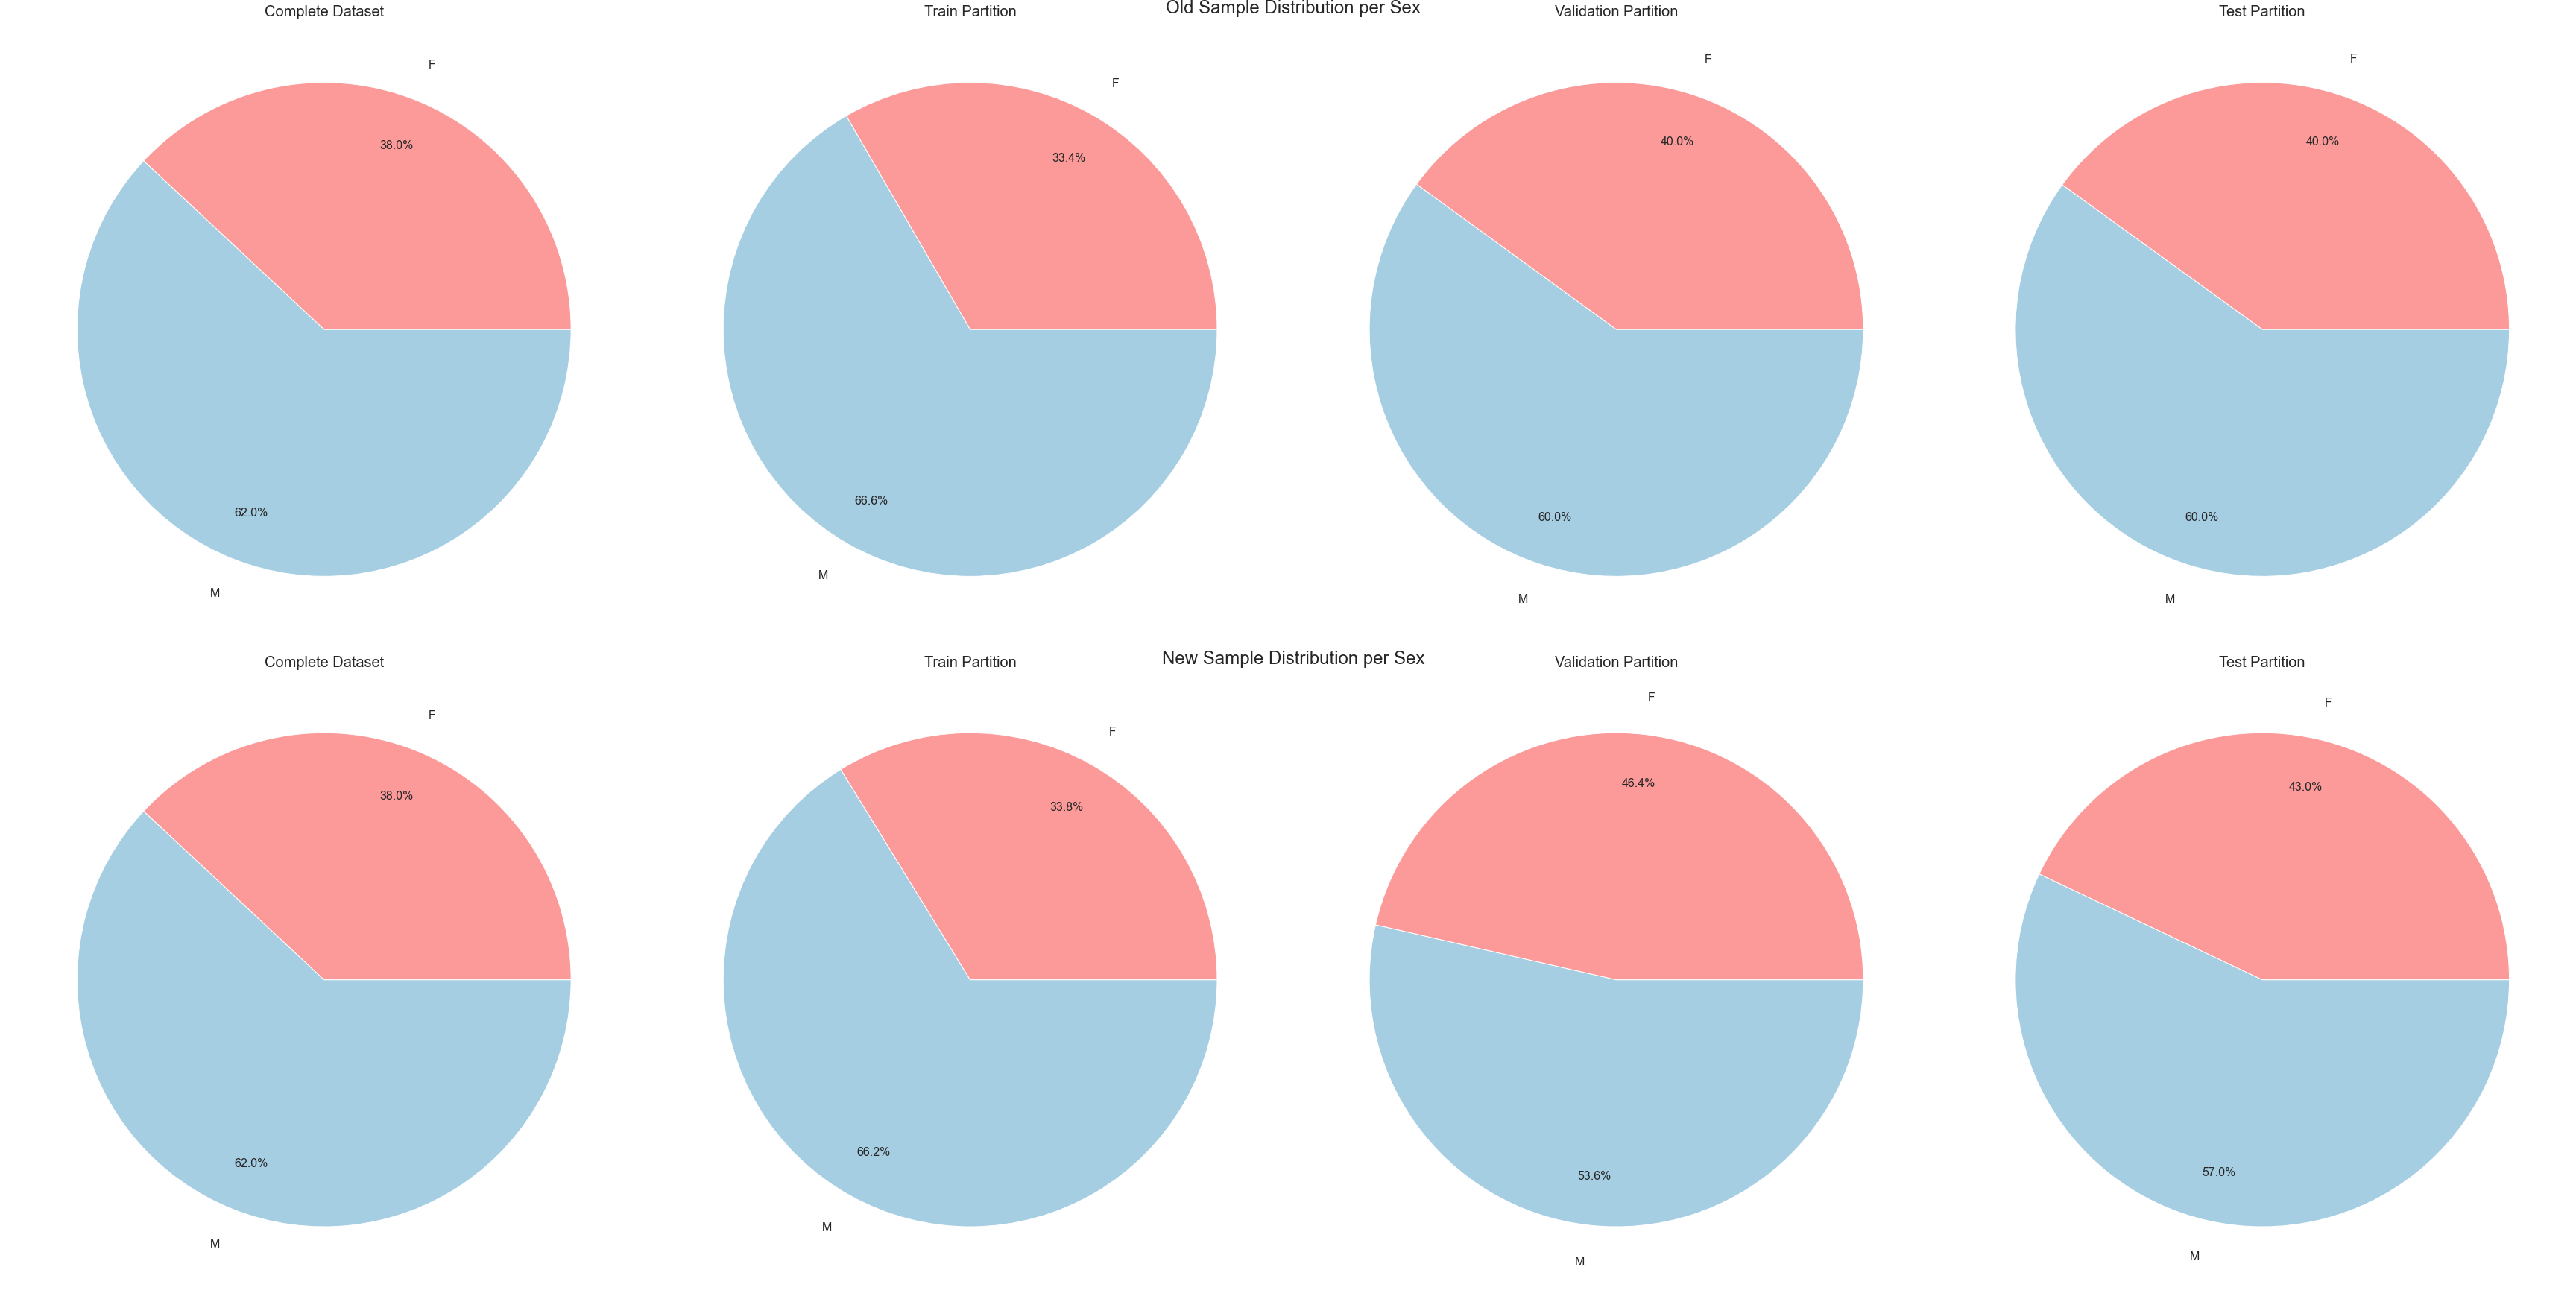

In [28]:
plot.column_as_pies( samples_df, new_samples_df, "sex", dataset_name, figsize = (48, 24), resplit = True )

In [29]:
plot.column_as_table( samples_df, new_samples_df, "sex", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 14425 
 4610 
 4944 
 4871 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 F 
 8855 
 2308 
 3295 
 3252 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Sex 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 M 
 14425 
 9395 
 2427 
 2603 
 
 
 F 
 8855 
 4792 
 2103 
 1960 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

## Country

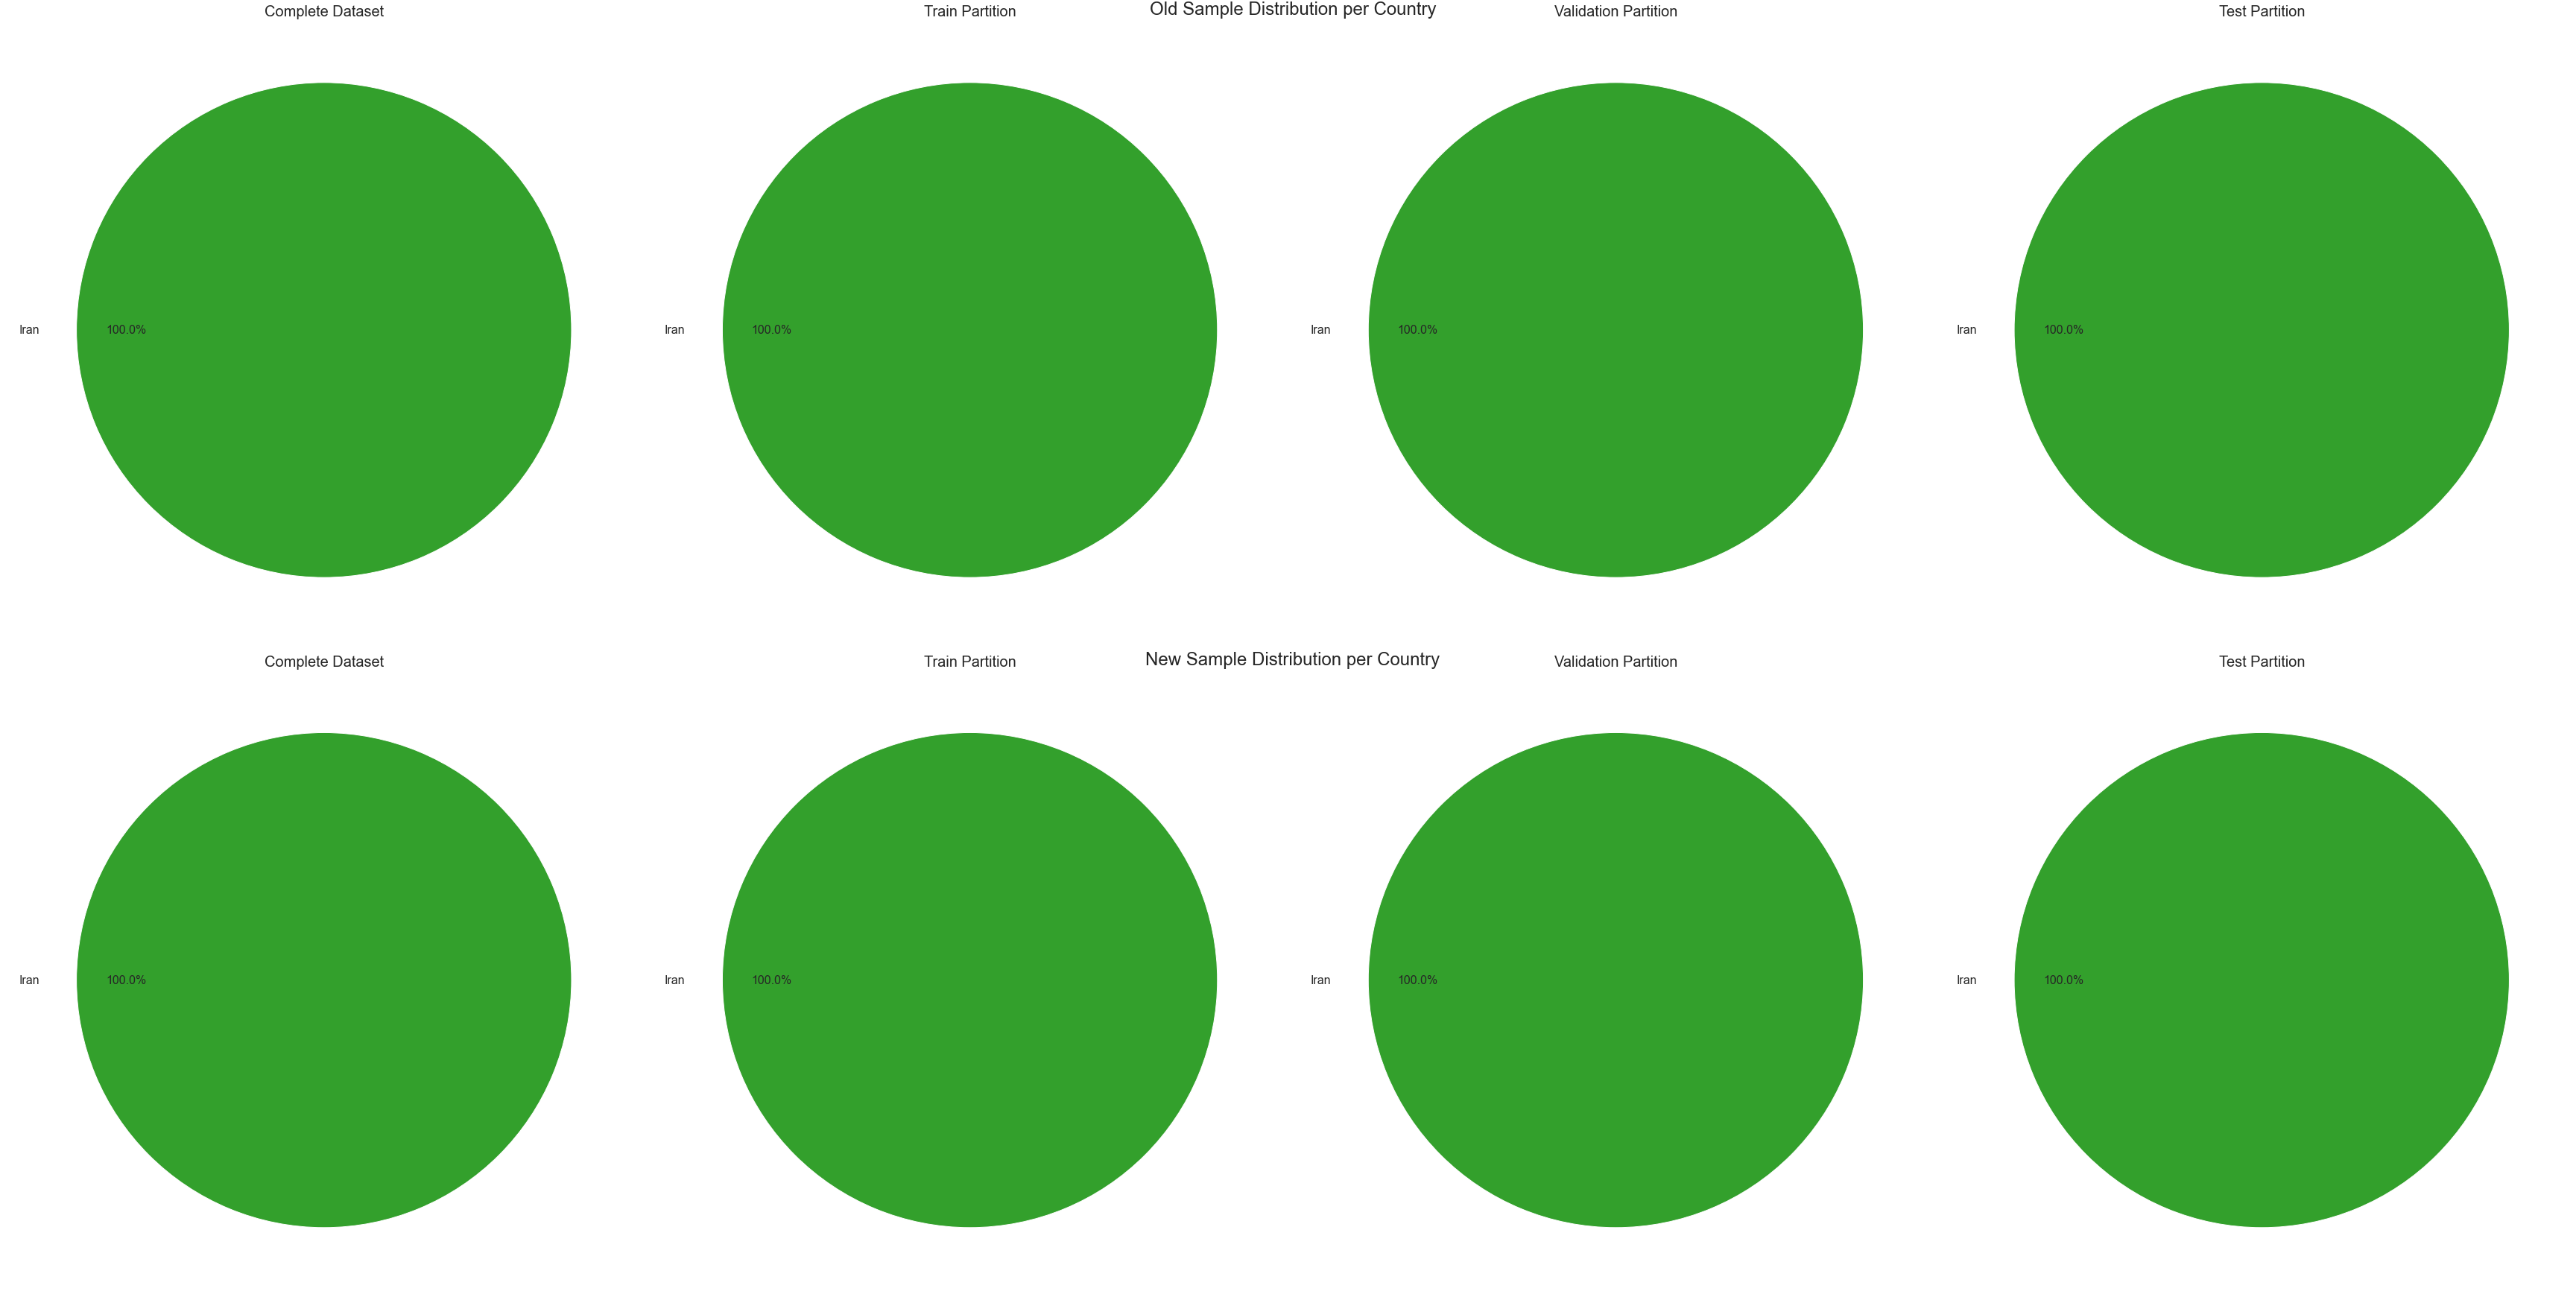

In [30]:
plot.column_as_pies( samples_df, new_samples_df, "country", dataset_name, figsize = (48, 24), resplit = True )

In [31]:
plot.column_as_table( samples_df, new_samples_df, "country", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 France 
 0 
 0 
 0 
 0 
 
 
 China 
 0 
 0 
 0 
 0 
 
 
 Iran 
 23280 
 6918 
 8239 
 8123 
 
 
 USA 
 0 
 0 
 0 
 0 
 
 
 N/A 
 0 
 0 
 0 
 0 
 
 
 Australia 
 0 
 0 
 0 
 0 
 
 
 Italy 
 0 
 0 
 0 
 0 
 
 
 Algeria 
 0 
 0 
 0 
 0 
 
 
 Belgium 
 0 
 0 
 0 
 0 
 
 
 England 
 0 
 0 
 0 
 0 
 
 
 Scotland 
 0 
 0 
 0 
 0 
 
 
 Turkey 
 0 
 0 
 0 
 0 
 
 
 Azerbaijan 
 0 
 0 
 0 
 0 
 
 
 Lebanon 
 0 
 0 
 0 
 0 
 
 
 Ukraine 
 0 
 0 
 0 
 0 
 
 
 Afghanistan 
 0 
 0 
 0 
 0 
 
 
 Peru 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Country 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Iran 
 23280 
 14187 
 4530 
 4563 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

## Partition

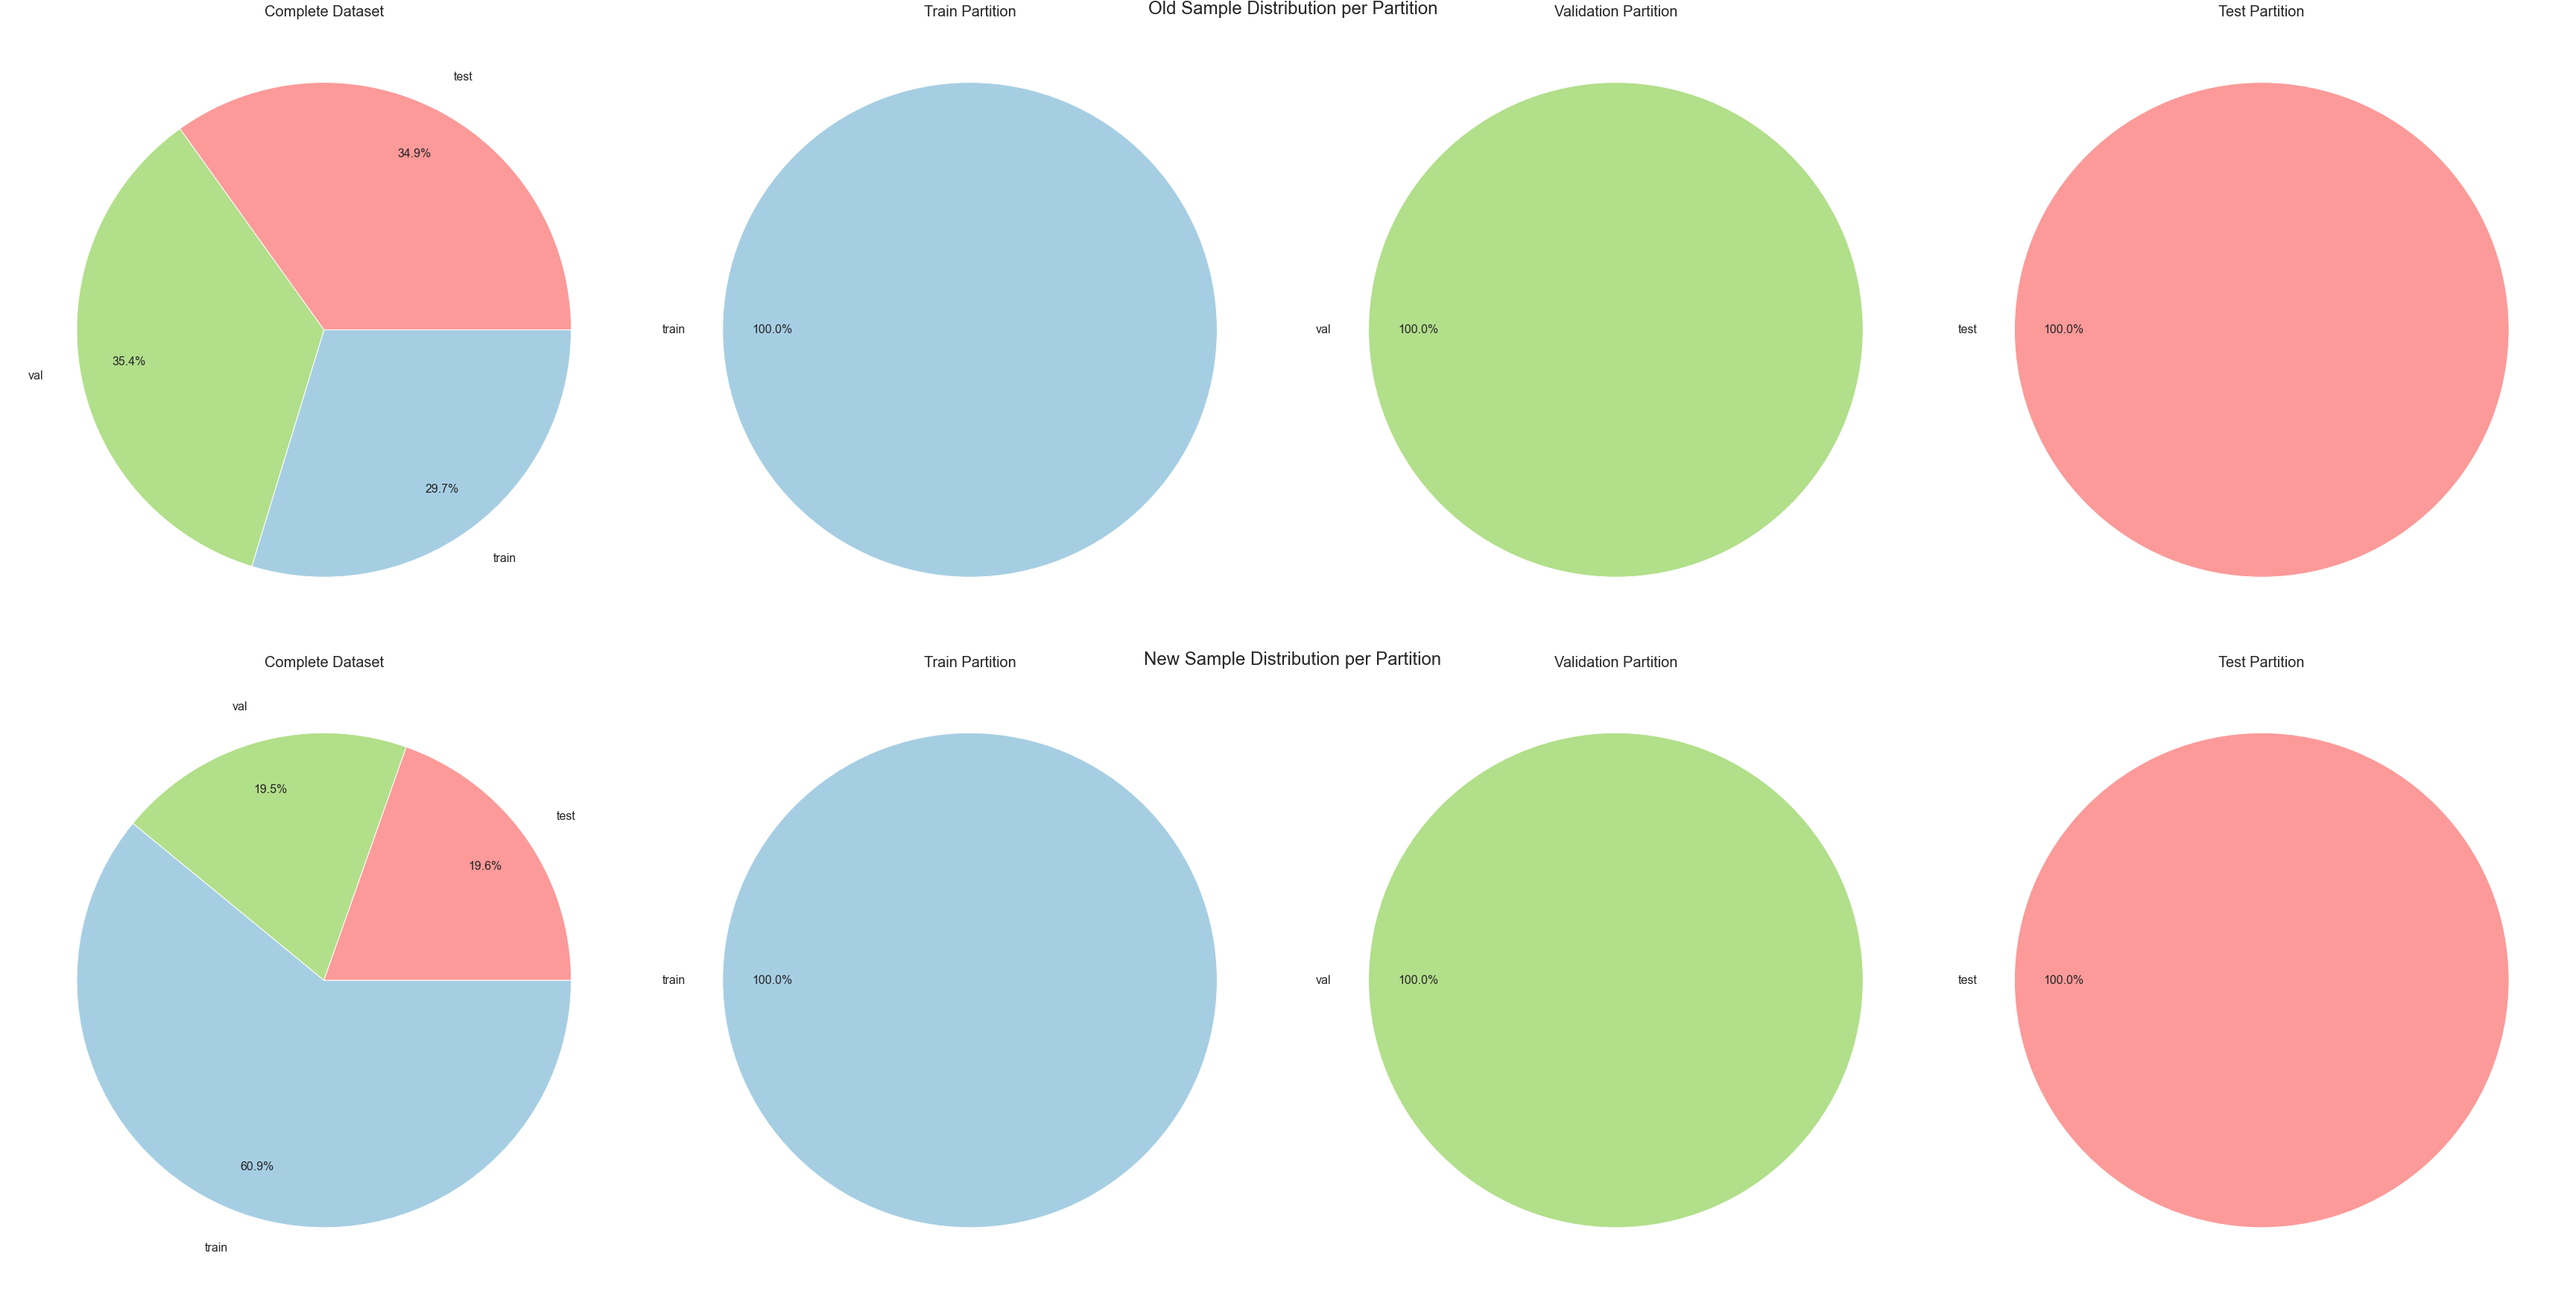

In [32]:
plot.column_as_pies( samples_df, new_samples_df, "partition", dataset_name, figsize = (48, 24), resplit = True )

In [33]:
plot.column_as_table( samples_df, new_samples_df, "partition", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 6918 
 6918 
 0 
 0 
 
 
 test 
 8123 
 0 
 0 
 8123 
 
 
 val 
 8239 
 0 
 8239 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Partition 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 train 
 14187 
 14187 
 0 
 0 
 
 
 test 
 4563 
 0 
 0 
 4563 
 
 
 val 
 4530 
 0 
 4530 
 0 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

## Slice Selection

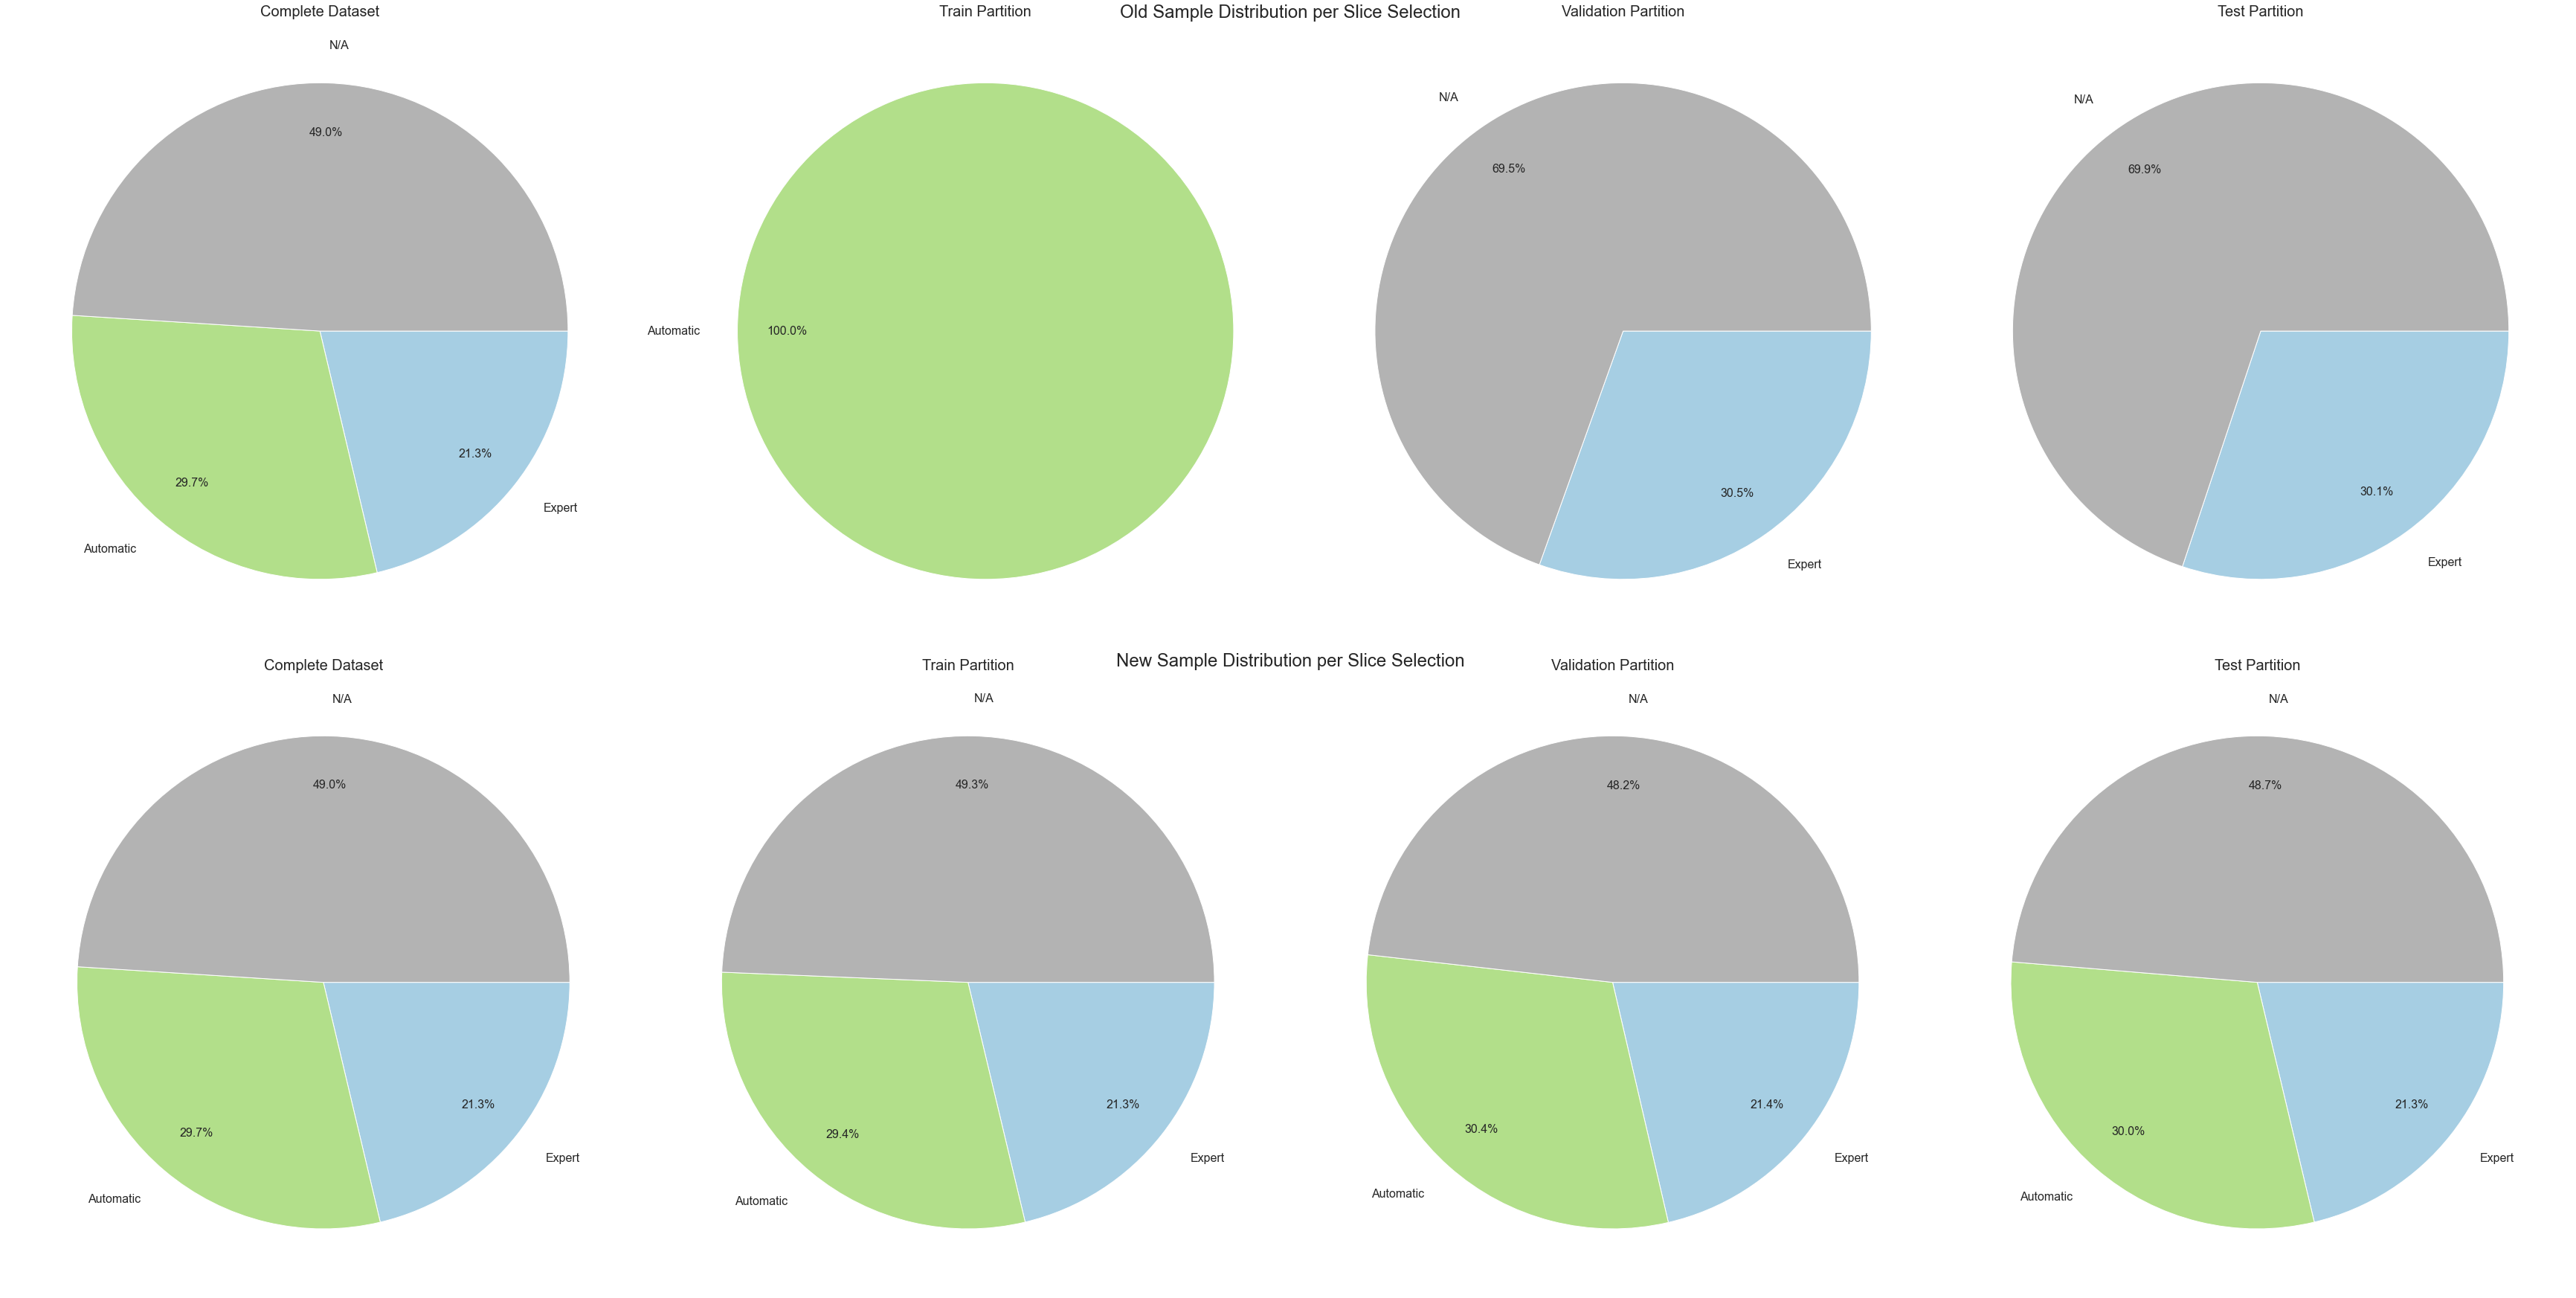

In [34]:
plot.column_as_pies( samples_df, new_samples_df, "slice_selection", dataset_name, figsize = (48, 24), resplit = True )

In [35]:
plot.column_as_table( samples_df, new_samples_df, "slice_selection", dataset_name, bin_flag = False, resplit = True )

Old Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 Automatic 
 6918 
 6918 
 0 
 0 
 
 
 Expert 
 4957 
 0 
 2511 
 2446 
 
 
 N/A 
 11405 
 0 
 5728 
 5677 
 
 
 Non-expert 
 0 
 0 
 0 
 0 
 
 
 SUM 
 23280 
 6918 
 8239 
 8123 
 
 
 New Sample Distribution
 by Slice Selection 
 
 
 
 Dataset 
 Train 
 Val 
 Test 
 
 
 Values 
 
 
 
 
 
 
 
 
 N/A 
 11405 
 7000 
 2184 
 2221 
 
 
 Automatic 
 6918 
 4169 
 1378 
 1371 
 
 
 Expert 
 4957 
 3018 
 968 
 971 
 
 
 SUM 
 23280 
 14187 
 4530 
 4563

# Registering Changes

In [36]:
# Path to save new metadata csv
csv_export_path = os.path.join( data_dir, "new_split_metadata.csv" )

updated_df = split.update_metadata_csv( csv_export_path, new_samples_df, dataset_name, save_bool = True )
print( len(updated_df), len(new_samples_df) )
updated_df.head()

410563 23280


filename patient_id source     class country sex   age  \
0  NCP_96_1328_0032.png     NCP_96   CNCB  COVID-19   China   M  74.0   
1  NCP_96_1328_0035.png     NCP_96   CNCB  COVID-19   China   M  74.0   
2  NCP_96_1328_0036.png     NCP_96   CNCB  COVID-19   China   M  74.0   
3  NCP_96_1328_0037.png     NCP_96   CNCB  COVID-19   China   M  74.0   
4  NCP_96_1328_0038.png     NCP_96   CNCB  COVID-19   China   M  74.0   

  partition slice_selection  x_min  y_min  x_max  y_max verified_finding  \
0     train          Expert      9     94    512    405              Yes   
1     train          Expert     10    106    512    405              Yes   
2     train          Expert     10    105    512    406              Yes   
3     train          Expert     11    104    512    406              Yes   
4     train          Expert     11    103    512    406              Yes   

    view modality  
0  Axial       CT  
1  Axial       CT  
2  Axial       CT  
3  Axial       CT  
4  Axial       CT